<a href="https://colab.research.google.com/github/wiltacca/Portfolio/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Install the necessary libraries:

!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 260 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 34.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
# Import all the required packages.

# For pandas and numpy.
import pandas as pd
import numpy as np

# For sklearn preprocessing.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler, PolynomialFeatures

# For Sklearn imputation.
from sklearn.impute import SimpleImputer

# For Sklearn pipeline.
from sklearn.pipeline import Pipeline

# For Sklearn linear models.
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, neighbors, tree, svm, ensemble

# For Sklearn metrics.
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay

# For Feature Engine imputation.
import feature_engine.imputation as mdi
from feature_engine.imputation import RandomSampleImputer, AddMissingIndicator

# For Feature Engine encoding.
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, RareLabelEncoder

# For Feature Engine discretisation.
from feature_engine.discretisation import EqualFrequencyDiscretiser

# For Feature Engine outliers.
from feature_engine.outliers import Winsorizer

# For Feature Engine transformation.
from feature_engine.transformation import LogTransformer, PowerTransformer, YeoJohnsonTransformer

# For ploting Visualisation.
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# For datetime.
from datetime import datetime

# Option controls the number of columns to be printed.
pd.set_option("max_columns", None)
# Turn off Option controls the number of columns to be printed.
#pd.reset_option("max_columns")

## Step 1: Load And Explore The Data

In [4]:
# Load the 3 datasets.

url1 = 'https://raw.githubusercontent.com/wiltacca/Portfolio/main/Datasets/player_award.csv'
url2 = 'https://raw.githubusercontent.com/wiltacca/Portfolio/main/Datasets/batting.csv'
url3 = 'https://raw.githubusercontent.com/wiltacca/Portfolio/main/Datasets/hall_of_fame.csv'

player_award_df = pd.read_csv(url1)
batting_df = pd.read_csv(url2)
hall_of_fame_df = pd.read_csv(url3)

### Explore player_award Table

In [ ]:
# Let inspect player_award dataframe.

player_award_df

,player_id,award_id,year,league_id,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN
...,...,...,...,...,...,...
6073,mccutan01,Silver Slugger,2015,NL,NaN,OF
6074,bumgama01,Silver Slugger,2015,NL,NaN,P
6075,crawfbr01,Silver Slugger,2015,NL,NaN,SS
6076,donaljo02,TSN Major League Player of the Year,2015,ML,NaN,NaN


In [ ]:
# Let perform exploratory analysis of the dataset.

# pandas.DataFrame.info prints a concise summary of a DataFrame.

player_award_df.info() # NaN is regarded as float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6078 entries, 0 to 6077
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   player_id  6078 non-null   object
 1   award_id   6078 non-null   object
 2   year       6078 non-null   int64 
 3   league_id  6078 non-null   object
 4   tie        45 non-null     object
 5   notes      4648 non-null   object
dtypes: int64(1), object(5)
memory usage: 285.0+ KB


In [ ]:
# Let view some basic statistical details like percentile, mean, std etc. of a dataframe.

# pandas.DataFrame.describe generates descriptive statistics.

player_award_df.describe()

,year
count,6078.000000
mean,1968.459033
std,30.567689
min,1877.000000
25%,1942.000000
50%,1974.000000
75%,1995.000000
max,2015.000000


In [ ]:
# Check shape (rows, columns) of dataframe.

# pandas.DataFrame.shape returns a tuple representing the dimensionality of the DataFrame.

player_award_df.shape

(6078, 6)

In [ ]:
# Let inspect the percentage of missing values in each variable in ascending order.

player_award_df.isnull().mean().sort_values(ascending=True)

player_id    0.000000
award_id     0.000000
year         0.000000
league_id    0.000000
notes        0.235275
tie          0.992596
dtype: float64

In [ ]:
# Let inspect the total number of missing values in each variable in ascending order.

player_award_df.isnull().sum().sort_values(ascending=True)

player_id       0
award_id        0
year            0
league_id       0
notes        1430
tie          6033
dtype: int64

### Explore batting Table

In [ ]:
# Let inspect batting dataframe.

batting_df

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,0.0,0.0,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,5.0,0.0,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,2.0,2.0,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,3.0,0.0,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101327,zitoba01,2015,1,OAK,AL,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101328,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,2.0,6.0,33.0,1.0,1.0,33.0,26.0,2.0,0.0,0.0,3.0,5.0
101329,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,1.0,7.0,23.0,2.0,3.0,29.0,30.0,1.0,1.0,0.0,2.0,3.0
101330,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,0.0,11.0,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


In [ ]:
# Let perform exploratory analysis of the dataset.

# pandas.DataFrame.info prints a concise summary of a DataFrame.

batting_df.info() # NaN is regarded as float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   player_id  101332 non-null  object 
 1   year       101332 non-null  int64  
 2   stint      101332 non-null  int64  
 3   team_id    101332 non-null  object 
 4   league_id  100595 non-null  object 
 5   g          101332 non-null  int64  
 6   ab         96183 non-null   float64
 7   r          96183 non-null   float64
 8   h          96183 non-null   float64
 9   double     96183 non-null   float64
 10  triple     96183 non-null   float64
 11  hr         96183 non-null   float64
 12  rbi        95759 non-null   float64
 13  sb         94883 non-null   float64
 14  cs         72729 non-null   float64
 15  bb         96183 non-null   float64
 16  so         88345 non-null   float64
 17  ibb        59620 non-null   float64
 18  hbp        93373 non-null   float64
 19  sh         89845 non-nu

In [ ]:
# Let view some basic statistical details like percentile, mean, std etc. of a dataframe.

# pandas.DataFrame.describe generates descriptive statistics.

batting_df.describe()

,year,stint,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
count,101332.000000,101332.000000,101332.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,95759.000000,94883.000000,72729.000000,96183.000000,88345.000000,59620.000000,93373.000000,89845.000000,60151.000000,70075.000000
mean,1963.506533,1.077567,51.400111,149.970327,19.887038,39.261647,6.637067,1.373361,2.949305,17.965163,3.158184,1.324025,13.811484,21.629849,1.213234,1.113395,2.457900,1.150122,3.210032
std,38.628278,0.283676,47.145273,186.557072,28.671365,53.310941,9.801563,2.710547,6.409662,26.756514,7.922994,2.838196,21.092775,28.432978,2.894918,2.320660,4.347818,2.023981,4.835881
min,1871.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1933.000000,1.000000,13.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1972.000000,1.000000,34.000000,57.000000,5.000000,11.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,10.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1997.000000,1.000000,80.250000,251.000000,30.000000,63.000000,10.000000,2.000000,3.000000,27.000000,2.000000,1.000000,20.000000,30.000000,1.000000,1.000000,3.000000,2.000000,5.000000
max,2015.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [ ]:
# Check shape (rows, columns) of dataframe.

# pandas.DataFrame.shape returns a tuple representing the dimensionality of the DataFrame.

batting_df.shape

(101332, 22)

In [ ]:
# Let inspect the percentage of missing values in each variable in ascending order.

batting_df.isnull().mean().sort_values(ascending=True)

player_id    0.000000
year         0.000000
stint        0.000000
team_id      0.000000
g            0.000000
league_id    0.007273
bb           0.050813
hr           0.050813
double       0.050813
triple       0.050813
r            0.050813
ab           0.050813
h            0.050813
rbi          0.054997
sb           0.063642
hbp          0.078544
sh           0.113360
so           0.128163
cs           0.282270
g_idp        0.308461
sf           0.406397
ibb          0.411637
dtype: float64

In [ ]:
# Let inspect the total number of missing values in each variable in ascending order.

batting_df.isnull().sum().sort_values(ascending=True)

player_id        0
year             0
stint            0
team_id          0
g                0
league_id      737
bb            5149
hr            5149
double        5149
triple        5149
r             5149
ab            5149
h             5149
rbi           5573
sb            6449
hbp           7959
sh           11487
so           12987
cs           28603
g_idp        31257
sf           41181
ibb          41712
dtype: int64

### Explore hall_of_fame Table

In [ ]:
# Let inspect hall_of_fame dataframe.

hall_of_fame_df

,player_id,yearid,votedby,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN
...,...,...,...,...,...,...,...,...,...
4115,grudzma01,2016,BBWAA,440.0,330.0,0.0,N,Player,NaN
4116,ausmubr01,2016,BBWAA,440.0,330.0,0.0,N,Player,NaN
4117,hamptmi01,2016,BBWAA,440.0,330.0,0.0,N,Player,NaN
4118,castilu01,2016,BBWAA,440.0,330.0,0.0,N,Player,NaN


In [ ]:
# Let perform exploratory analysis of the dataset.

# pandas.DataFrame.info prints a concise summary of a DataFrame.

hall_of_fame_df.info() # NaN is regarded as float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    4120 non-null   object 
 1   yearid       4120 non-null   int64  
 2   votedby      4120 non-null   object 
 3   ballots      3927 non-null   float64
 4   needed       3770 non-null   float64
 5   votes        3927 non-null   float64
 6   inducted     4120 non-null   object 
 7   category     4120 non-null   object 
 8   needed_note  157 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 289.8+ KB


In [ ]:
# Let view some basic statistical details like percentile, mean, std etc. of a dataframe.

# pandas.DataFrame.describe generates descriptive statistics.

hall_of_fame_df.describe()

,yearid,ballots,needed,votes
count,4120.000000,3927.000000,3770.000000,3927.000000
mean,1968.889563,320.705373,243.989920,50.995926
std,22.899162,125.495156,94.557016,84.845195
min,1936.000000,78.000000,59.000000,0.000000
25%,1950.000000,226.000000,175.000000,2.000000
50%,1964.000000,274.000000,213.000000,10.000000
75%,1987.000000,425.000000,321.000000,64.000000
max,2016.000000,581.000000,436.000000,555.000000


In [ ]:
# Check shape (rows, columns) of dataframe.

# pandas.DataFrame.shape returns a tuple representing the dimensionality of the DataFrame.

hall_of_fame_df.shape

(4120, 9)

In [ ]:
# Let inspect the percentage of missing values in each variable in ascending order.

hall_of_fame_df.isnull().mean().sort_values(ascending=True)

player_id      0.000000
yearid         0.000000
votedby        0.000000
inducted       0.000000
category       0.000000
ballots        0.046845
votes          0.046845
needed         0.084951
needed_note    0.961893
dtype: float64

In [ ]:
# Let inspect the total number of missing values in each variable in ascending order.

hall_of_fame_df.isnull().sum().sort_values(ascending=True)

player_id         0
yearid            0
votedby           0
inducted          0
category          0
ballots         193
votes           193
needed          350
needed_note    3963
dtype: int64

## Step 2: Data Wrangling On Multiple Tables 

In [ ]:
# Let join these two tables by inner join.

# pandas.DataFrame.merge merges DataFrame or named Series objects with a database-style join.

# on : label or list
# Column or index level names to join on.

# how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’
# Type of merge to be performed.

player_df0 = pd.merge(hall_of_fame_df, player_award_df, on='player_id',
              how ='inner')

In [ ]:
# Check shape (rows, columns) of dataframe.

# pandas.DataFrame.shape returns a tuple representing the dimensionality of the DataFrame.

player_df0.shape

(22542, 14)

In [ ]:
# Let join these two tables by inner join.

# pandas.DataFrame.merge merges DataFrame or named Series objects with a database-style join.

# on : label or list
# Column or index level names to join on.

# how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’
# Type of merge to be performed.

# suffixes : list-like, default is (“_x”, “_y”)
# A length-2 sequence where each element is optionally a string indicating the suffix 
# to add to overlapping column names in left and right respectively.

player_df = pd.merge(player_df0, batting_df, on='player_id', how ='inner'
                     , suffixes=('_Award_', '_Bat_'))

In [ ]:
# Check shape (rows, columns) of dataframe.

# pandas.DataFrame.shape returns a tuple representing the dimensionality of the DataFrame.

player_df.shape

(393674, 35)

In [ ]:
# Let perform exploratory analysis of the dataset.

# pandas.DataFrame.info prints a concise summary of a DataFrame.

player_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393674 entries, 0 to 393673
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   player_id         393674 non-null  object 
 1   yearid            393674 non-null  int64  
 2   votedby           393674 non-null  object 
 3   ballots           385715 non-null  float64
 4   needed            364902 non-null  float64
 5   votes             385715 non-null  float64
 6   inducted          393674 non-null  object 
 7   category          393674 non-null  object 
 8   needed_note       20813 non-null   object 
 9   award_id          393674 non-null  object 
 10  year_Award_       393674 non-null  int64  
 11  league_id_Award_  393674 non-null  object 
 12  tie               1362 non-null    object 
 13  notes             324327 non-null  object 
 14  year_Bat_         393674 non-null  int64  
 15  stint             393674 non-null  int64  
 16  team_id           39

### Deriving Representations of The Year

In [ ]:
# Let check maximun and minimum dates.

# pandas.DataFrame.agg aggregates using one or more operations over the specified axis.

player_df['year_Award_'].agg(['min', 'max'])

min    1877
max    2008
Name: year_Award_, dtype: int64

In [ ]:
# Let check maximun and minimum dates.

# pandas.DataFrame.agg aggregates using one or more operations over the specified axis.

player_df['year_Bat_'].agg(['min', 'max'])

min    1874
max    2010
Name: year_Bat_, dtype: int64

In [ ]:
# Let Convert the year_Award_ column to datetime.

# pandas.to_datetime converts argument to datetime.

player_df['year_Award_'] =  pd.to_datetime(player_df['year_Award_'])

# Let Convert the `year_Bat_ column to datetime.

player_df['year_Bat_'] = pd.to_datetime(player_df['year_Bat_'])

# Let extract year part in a new column.

player_df['year_Award_Num'] = player_df['year_Award_'].dt.year # year of the datetime

player_df['year_Bat_Num'] = player_df['year_Bat_'].dt.year # year of the datetime

# Let check the data type to confirm the successful conversion.

player_df.dtypes

player_id                   object
yearid                       int64
votedby                     object
ballots                    float64
needed                     float64
votes                      float64
inducted                    object
category                    object
needed_note                 object
award_id                    object
year_Award_         datetime64[ns]
league_id_Award_            object
tie                         object
notes                       object
year_Bat_           datetime64[ns]
stint                        int64
team_id                     object
league_id_Bat_              object
g                            int64
ab                         float64
r                          float64
h                          float64
double                     float64
triple                     float64
hr                         float64
rbi                        float64
sb                         float64
cs                         float64
bb                  

### Subsetting The Dataframe

In [ ]:
# Let only select the records related to player.

player_df = player_df[player_df.category == 'Player']

# Let get the first n rows.

player_df.head()

,player_id,yearid,votedby,ballots,needed,votes,inducted,category,needed_note,award_id,year_Award_,league_id_Award_,tie,notes,year_Bat_,stint,team_id,league_id_Bat_,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,year_Award_Num,year_Bat_Num
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,Baseball Magazine All-Star,1970-01-01 00:00:00.000001908,AL,NaN,RF,1970-01-01 00:00:00.000001905,1,DET,AL,41,150.0,19.0,36.0,6.0,0.0,1.0,15.0,2.0,NaN,10.0,NaN,NaN,0.0,4.0,NaN,NaN,1970,1970
1,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,Baseball Magazine All-Star,1970-01-01 00:00:00.000001908,AL,NaN,RF,1970-01-01 00:00:00.000001906,1,DET,AL,98,358.0,45.0,113.0,15.0,5.0,1.0,34.0,23.0,NaN,19.0,NaN,NaN,3.0,14.0,NaN,NaN,1970,1970
2,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,Baseball Magazine All-Star,1970-01-01 00:00:00.000001908,AL,NaN,RF,1970-01-01 00:00:00.000001907,1,DET,AL,150,605.0,97.0,212.0,28.0,14.0,5.0,119.0,49.0,NaN,24.0,NaN,NaN,5.0,12.0,NaN,NaN,1970,1970
3,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,Baseball Magazine All-Star,1970-01-01 00:00:00.000001908,AL,NaN,RF,1970-01-01 00:00:00.000001908,1,DET,AL,150,581.0,88.0,188.0,36.0,20.0,4.0,108.0,39.0,NaN,34.0,NaN,NaN,6.0,14.0,NaN,NaN,1970,1970
4,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,Baseball Magazine All-Star,1970-01-01 00:00:00.000001908,AL,NaN,RF,1970-01-01 00:00:00.000001909,1,DET,AL,156,573.0,116.0,216.0,33.0,10.0,9.0,107.0,76.0,NaN,48.0,NaN,NaN,6.0,24.0,NaN,NaN,1970,1970


### Create New Feature AVE

In [ ]:
# Let create Batting Average (`AVE`) column.

player_df['AVE'] = player_df['h'] / player_df['ab']

### Create New Feature Target

In [ ]:
# Let create a target column.

player_df['target']= np.where(player_df.inducted == 'Y', 1, 0)

### Find Categorical Variables

In [ ]:
# Let find categorical variables.

cat_cols = [c for c in player_df.columns if player_df[c].dtypes=='O'] # =='O' is (Python) object

# Get the first n rows.

player_df[cat_cols].head()

,player_id,votedby,inducted,category,needed_note,award_id,league_id_Award_,tie,notes,team_id,league_id_Bat_
0,cobbty01,BBWAA,Y,Player,NaN,Baseball Magazine All-Star,AL,NaN,RF,DET,AL
1,cobbty01,BBWAA,Y,Player,NaN,Baseball Magazine All-Star,AL,NaN,RF,DET,AL
2,cobbty01,BBWAA,Y,Player,NaN,Baseball Magazine All-Star,AL,NaN,RF,DET,AL
3,cobbty01,BBWAA,Y,Player,NaN,Baseball Magazine All-Star,AL,NaN,RF,DET,AL
4,cobbty01,BBWAA,Y,Player,NaN,Baseball Magazine All-Star,AL,NaN,RF,DET,AL


### Find Numerical Variables

In [ ]:
# Let find numerical variables.

num_cols = [c for c in player_df.columns if player_df[c].dtypes!='O'] # !='O' is NOT (Python) object

# Get the first n rows.

player_df[num_cols].head()

,yearid,ballots,needed,votes,year_Award_,year_Bat_,stint,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,year_Award_Num,year_Bat_Num,AVE,target
0,1936,226.0,170.0,222.0,1970-01-01 00:00:00.000001908,1970-01-01 00:00:00.000001905,1,41,150.0,19.0,36.0,6.0,0.0,1.0,15.0,2.0,NaN,10.0,NaN,NaN,0.0,4.0,NaN,NaN,1970,1970,0.240000,1
1,1936,226.0,170.0,222.0,1970-01-01 00:00:00.000001908,1970-01-01 00:00:00.000001906,1,98,358.0,45.0,113.0,15.0,5.0,1.0,34.0,23.0,NaN,19.0,NaN,NaN,3.0,14.0,NaN,NaN,1970,1970,0.315642,1
2,1936,226.0,170.0,222.0,1970-01-01 00:00:00.000001908,1970-01-01 00:00:00.000001907,1,150,605.0,97.0,212.0,28.0,14.0,5.0,119.0,49.0,NaN,24.0,NaN,NaN,5.0,12.0,NaN,NaN,1970,1970,0.350413,1
3,1936,226.0,170.0,222.0,1970-01-01 00:00:00.000001908,1970-01-01 00:00:00.000001908,1,150,581.0,88.0,188.0,36.0,20.0,4.0,108.0,39.0,NaN,34.0,NaN,NaN,6.0,14.0,NaN,NaN,1970,1970,0.323580,1
4,1936,226.0,170.0,222.0,1970-01-01 00:00:00.000001908,1970-01-01 00:00:00.000001909,1,156,573.0,116.0,216.0,33.0,10.0,9.0,107.0,76.0,NaN,48.0,NaN,NaN,6.0,24.0,NaN,NaN,1970,1970,0.376963,1


### Highlighting Outliers

Text(0.5, 1.0, 'Boxplot For ballots Variable')

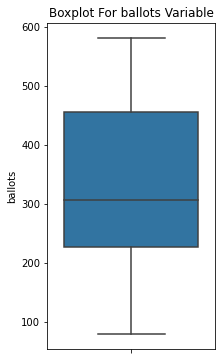

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the ballots variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['ballots'])

# add title

plt.title('Boxplot For ballots Variable')

# Note: We can see that there is no outlier.

Text(0.5, 1.0, 'Boxplot For needed Variable')

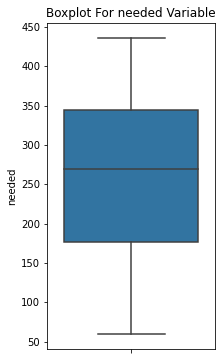

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the needed variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['needed'])

# add title

plt.title('Boxplot For needed Variable')

# Note: We can see that there is no outlier.

Text(0.5, 1.0, 'Boxplot For votes Variable')

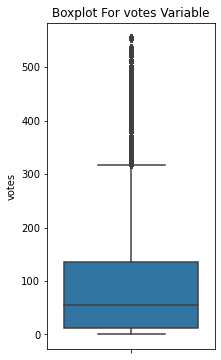

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the votes variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['votes'])

# add title

plt.title('Boxplot For votes Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For stint Variable')

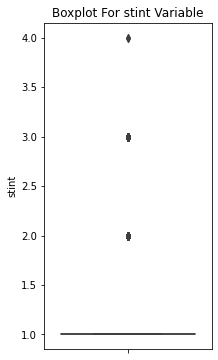

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the stint variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['stint'])

# add title

plt.title('Boxplot For stint Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For g Variable')

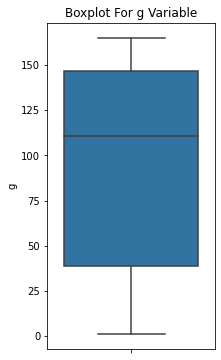

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the g variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['g'])

# add title

plt.title('Boxplot For g Variable')

# Note: We can see that there is no outlier.

Text(0.5, 1.0, 'Boxplot For ab Variable')

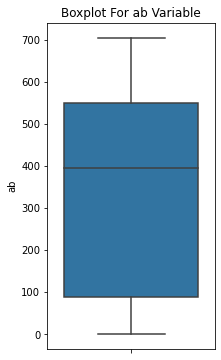

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the ab variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['ab'])

# add title

plt.title('Boxplot For ab Variable')

# Note: We can see that there is no outlier.

Text(0.5, 1.0, 'Boxplot For r Variable')

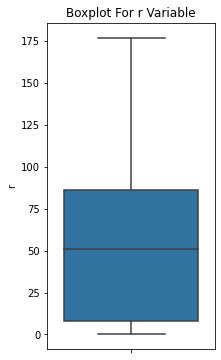

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the r variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['r'])

# add title

plt.title('Boxplot For r Variable')

# Note: We can see that there is no outlier.

Text(0.5, 1.0, 'Boxplot For h Variable')

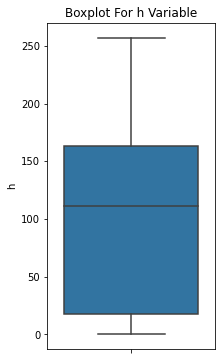

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the h variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['h'])

# add title

plt.title('Boxplot For h Variable')

# Note: We can see that there is no outlier.

Text(0.5, 1.0, 'Boxplot For double Variable')

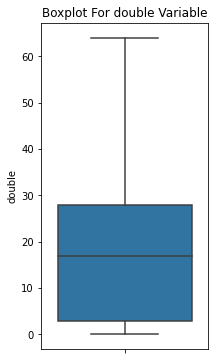

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the double variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['double'])

# add title

plt.title('Boxplot For double Variable')

# Note: We can see that there is no outlier.

Text(0.5, 1.0, 'Boxplot For triple Variable')

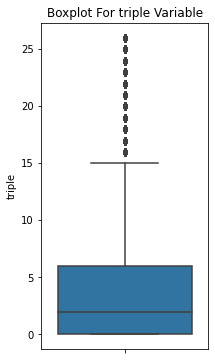

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the triple variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['triple'])

# add title

plt.title('Boxplot For triple Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For hr Variable')

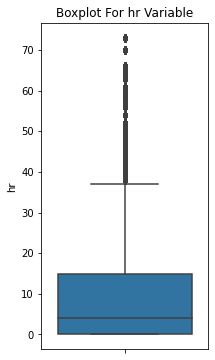

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the hr variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['hr'])

# add title

plt.title('Boxplot For hr Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For rbi Variable')

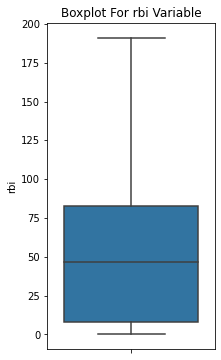

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the rbi variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['rbi'])

# add title

plt.title('Boxplot For rbi Variable')

# Note: We can see that there is no outlier.

Text(0.5, 1.0, 'Boxplot For sb Variable')

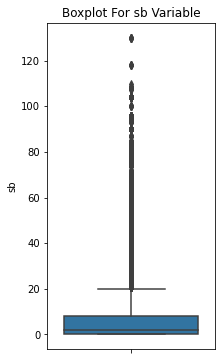

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the sb variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['sb'])

# add title

plt.title('Boxplot For sb Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For cs Variable')

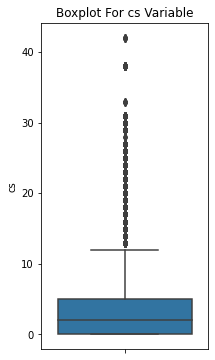

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the cs variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['cs'])

# add title

plt.title('Boxplot For cs Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For bb Variable')

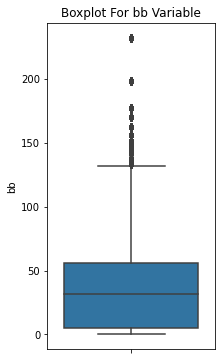

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the bb variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['bb'])

# add title

plt.title('Boxplot For bb Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For so Variable')

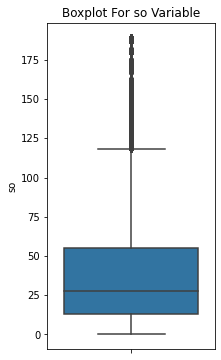

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the so variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['so'])

# add title

plt.title('Boxplot For so Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For ibb Variable')

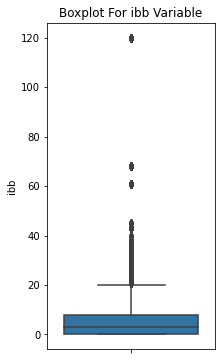

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the ibb variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['ibb'])

# add title

plt.title('Boxplot For ibb Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For hbp Variable')

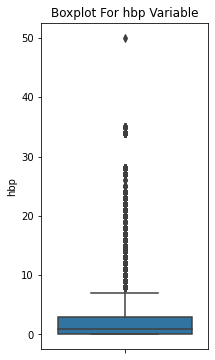

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the hbp variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['hbp'])

# add title

plt.title('Boxplot For hbp Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For sh Variable')

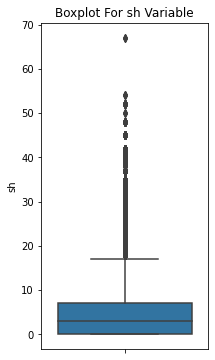

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the sh variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['sh'])

# add title

plt.title('Boxplot For sh Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For sf Variable')

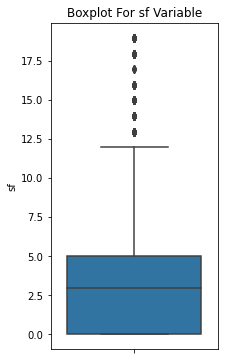

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the sf variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['sf'])

# add title

plt.title('Boxplot For sf Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For g_idp Variable')

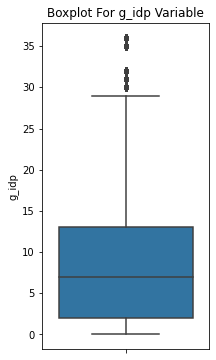

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the g_idp variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['g_idp'])

# add title

plt.title('Boxplot For g_idp Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For AVE Variable')

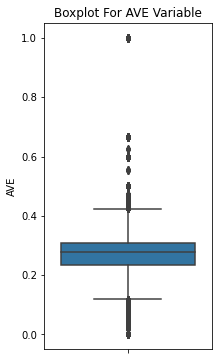

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the AVE variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['AVE'])

# add title

plt.title('Boxplot For AVE Variable')

# Note: We can see that there are many outliers.

Text(0.5, 1.0, 'Boxplot For target Variable')

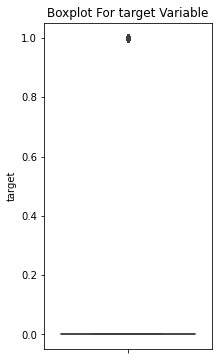

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect the performance of some machine learning models.

# Make a boxplot for the target variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df['target'])

# add title

plt.title('Boxplot For target Variable')

# Note: We can see that there are many outliers.

## Step 3: Data Cleansing And Transformation

### Trimming Outliers By Finding Boundaries Using Inter-Quartile Range Proximity Rule (IQR)

In [ ]:
# Let create a function to find the boundaries of a variable distribution, using the
# inter-quartile range proximity rule (IQR).

def find_boundaries(df, variable, distance):

    # Let calculate the boundaries outside which sit the outliers for skewed distributions:

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate the boundaries.
    
    # pandas.DataFrame.quantile returns values at the given quantile over requested axis.
    # q : float or array-like, default 0.5 (50% quantile)
    # Value between 0 <= q <= 1, the quantile(s) to compute.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# Let determine the limits of the votes variable.

votes_upper_limit, votes_lower_limit = find_boundaries(player_df, 'votes', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

votes_upper_limit, votes_lower_limit

(319.5, -172.5)

In [ ]:
# Let determine the limits of the triple variable.

triple_upper_limit, triple_lower_limit = find_boundaries(player_df, 'triple', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

triple_upper_limit, triple_lower_limit

(15.0, -9.0)

In [ ]:
# Let determine the limits of the hr variable.

hr_upper_limit, hr_lower_limit = find_boundaries(player_df, 'hr', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

hr_upper_limit, hr_lower_limit

(37.5, -22.5)

In [ ]:
# Let determine the limits of the sb variable.

sb_upper_limit, sb_lower_limit = find_boundaries(player_df, 'sb', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

sb_upper_limit, sb_lower_limit

(20.0, -12.0)

In [ ]:
# Let determine the limits of the cs variable.

cs_upper_limit, cs_lower_limit = find_boundaries(player_df, 'cs', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

cs_upper_limit, cs_lower_limit

(12.5, -7.5)

In [ ]:
# Let determine the limits of the bb variable.

bb_upper_limit, bb_lower_limit = find_boundaries(player_df, 'bb', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

bb_upper_limit, bb_lower_limit

(132.5, -71.5)

In [ ]:
# Let determine the limits of the so variable.

so_upper_limit, so_lower_limit = find_boundaries(player_df, 'so', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

so_upper_limit, so_lower_limit

(118.0, -50.0)

In [ ]:
# Let determine the limits of the ibb variable.

ibb_upper_limit, ibb_lower_limit = find_boundaries(player_df, 'ibb', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

ibb_upper_limit,ibb_lower_limit

(20.0, -12.0)

In [ ]:
# Let determine the limits of the hbp variable.

hbp_upper_limit, hbp_lower_limit = find_boundaries(player_df, 'hbp', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

hbp_upper_limit,hbp_lower_limit

(7.5, -4.5)

In [ ]:
# Let determine the limits of the sh variable.

sh_upper_limit, sh_lower_limit = find_boundaries(player_df, 'sh', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

sh_upper_limit,sh_lower_limit

(17.5, -10.5)

In [ ]:
# Let determine the limits of the sf variable.

sf_upper_limit, sf_lower_limit = find_boundaries(player_df, 'sf', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

sf_upper_limit,sf_lower_limit

(12.5, -7.5)

In [ ]:
# Let determine the limits of the g_idp variable.

g_idp_upper_limit, g_idp_lower_limit = find_boundaries(player_df, 'g_idp', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

g_idp_upper_limit,g_idp_lower_limit

(29.5, -14.5)

In [ ]:
# Let determine the limits of the AVE variable.

AVE_upper_limit, AVE_lower_limit = find_boundaries(player_df, 'AVE', 1.5) # use 3 to find very extreme

# Let print those limits beyond which we will consider a value an outlier

AVE_upper_limit,AVE_lower_limit

(0.42398370460258306, 0.11830054029065903)

In [ ]:
# Let flag the outliers in the dataset for votes variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_votes = np.where(player_df['votes'] > votes_upper_limit, True,
                    np.where(player_df['votes'] < votes_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for triple variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_triple = np.where(player_df['triple'] > triple_upper_limit, True,
                    np.where(player_df['triple'] < triple_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for hr variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_hr = np.where(player_df['hr'] > hr_upper_limit, True,
                    np.where(player_df['hr'] < hr_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for sb variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_sb = np.where(player_df['sb'] >sb_upper_limit, True,
                    np.where(player_df['sb'] < sb_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for cs variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_cs = np.where(player_df['cs'] >cs_upper_limit, True,
                    np.where(player_df['cs'] < cs_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for bb variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_bb = np.where(player_df['bb'] >bb_upper_limit, True,
                    np.where(player_df['bb'] < bb_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for so variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_so = np.where(player_df['so'] >so_upper_limit, True,
                    np.where(player_df['so'] < so_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for ibb variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_ibb = np.where(player_df['ibb'] >ibb_upper_limit, True,
                    np.where(player_df['ibb'] < ibb_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for hbp variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_hbp = np.where(player_df['hbp'] >hbp_upper_limit, True,
                    np.where(player_df['hbp'] < hbp_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for sh variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_sh = np.where(player_df['sh'] >sh_upper_limit, True,
                    np.where(player_df['sh'] < sh_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for sf variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_sf = np.where(player_df['sf'] >sf_upper_limit, True,
                    np.where(player_df['sf'] < sf_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for g_idp variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_g_idp = np.where(player_df['g_idp'] >g_idp_upper_limit, True,
                    np.where(player_df['g_idp'] < g_idp_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for AVE variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_AVE = np.where(player_df['AVE'] >AVE_upper_limit, True,
                    np.where(player_df['AVE'] < AVE_lower_limit, True, False))

In [ ]:
# Create a new dataframe with the outlier values and trimm (remove) the dataset of outliers 
# across multiple variables.

player_df_trimmed = player_df.loc[~(outliers_votes + outliers_triple + outliers_hr + 
                                    outliers_sb + outliers_cs + outliers_bb + outliers_so +
                                    outliers_ibb + outliers_hbp + outliers_sh + outliers_sf + 
                                    outliers_g_idp + outliers_AVE), ]  # ~ NOT outliers

player_df.shape, player_df_trimmed.shape 
# Original dataframe (total rows = 393029, total columns = 39)
# Trimmed dataframe (total rows = 252914, total columns = 39)

((393029, 39), (269538, 39))

Text(0.5, 1.0, 'Boxplot For votes Variable')

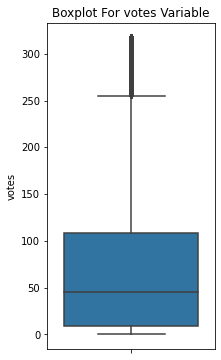

In [ ]:
# Re-plot a boxplot for the votes variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df_trimmed['votes'])

# add title

plt.title('Boxplot For votes Variable')

# Note: We can see that most of the outliers are removed.

Text(0.5, 1.0, 'Boxplot For triple Variable')

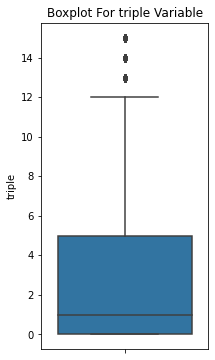

In [ ]:
# Re-plot a boxplot for the triple variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df_trimmed['triple'])

# add title

plt.title('Boxplot For triple Variable')

# Note: We can see that most of the outliers are removed.

Text(0.5, 1.0, 'Boxplot For hr Variable')

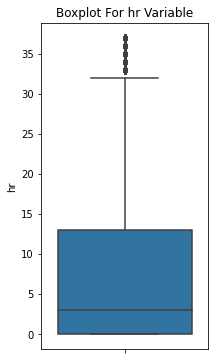

In [ ]:
# Re-plot a boxplot for the hr variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df_trimmed['hr'])

# add title

plt.title('Boxplot For hr Variable')

# Note: We can see that most of the outliers are removed.

Text(0.5, 1.0, 'Boxplot For sb Variable')

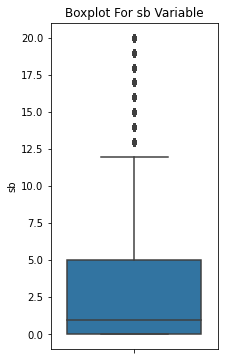

In [ ]:
# Re-plot a boxplot for the sb variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df_trimmed['sb'])

# add title

plt.title('Boxplot For sb Variable')

# Note: We can see that most of the outliers are removed.

Text(0.5, 1.0, 'Boxplot For cs Variable')

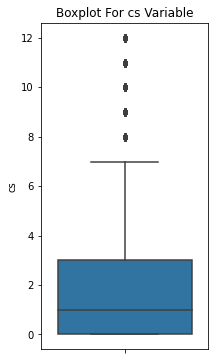

In [ ]:
# Re-plot a boxplot for the cs variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df_trimmed['cs'])

# add title

plt.title('Boxplot For cs Variable')

# Note: We can see that most of the outliers are removed.

Text(0.5, 1.0, 'Boxplot For bb Variable')

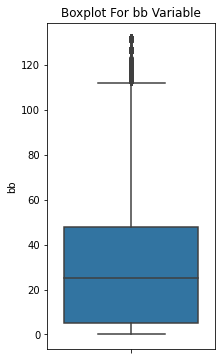

In [ ]:
# Re-plot a boxplot for the bb variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df_trimmed['bb'])

# add title

plt.title('Boxplot For bb Variable')

# Note: We can see that most of the outliers are removed.

Text(0.5, 1.0, 'Boxplot For so Variable')

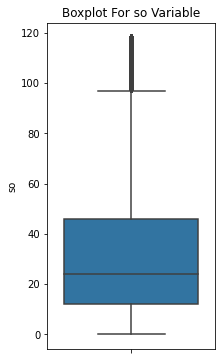

In [ ]:
# Re-plot a boxplot for the so variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df_trimmed['so'])

# add title

plt.title('Boxplot For so Variable')

# Note: We can see that most of the outliers are removed.

Text(0.5, 1.0, 'Boxplot For ibb Variable')

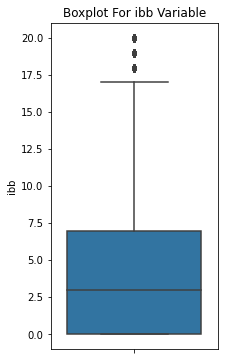

In [ ]:
# Re-plot a boxplot for the ibb variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df_trimmed['ibb'])

# add title

plt.title('Boxplot For ibb Variable')

# Note: We can see that most of the outliers are removed.

Text(0.5, 1.0, 'Boxplot For hbp Variable')

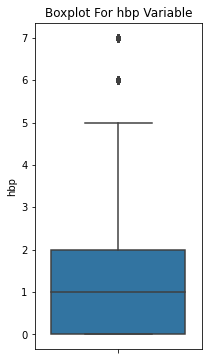

In [ ]:
# Re-plot a boxplot for the hbp variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df_trimmed['hbp'])

# add title

plt.title('Boxplot For hbp Variable')

# Note: We can see that most of the outliers are removed.

Text(0.5, 1.0, 'Boxplot For sh Variable')

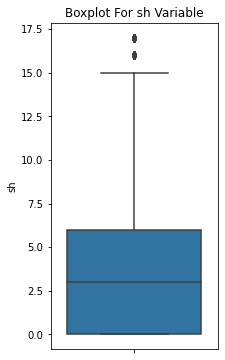

In [ ]:
# Re-plot a boxplot for the sh variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df_trimmed['sh'])

# add title

plt.title('Boxplot For sh Variable')

# Note: We can see that most of the outliers are removed.

Text(0.5, 1.0, 'Boxplot For sf Variable')

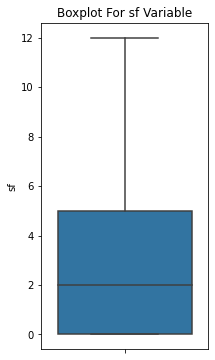

In [ ]:
# Re-plot a boxplot for the sf variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df_trimmed['sf'])

# add title

plt.title('Boxplot For sf Variable')

# Note: We can see that all of the outliers are removed.

Text(0.5, 1.0, 'Boxplot For g_idp Variable')

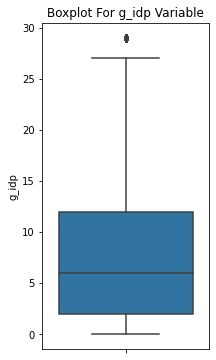

In [ ]:
# Re-plot a boxplot for the g_idp variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df_trimmed['g_idp'])

# add title

plt.title('Boxplot For g_idp Variable')

# Note: We can see that all of the outliers are removed.

Text(0.5, 1.0, 'Boxplot For AVE Variable')

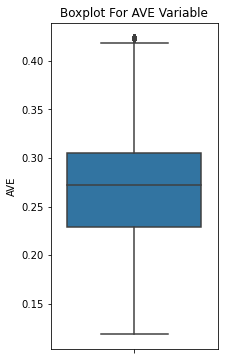

In [ ]:
# Re-plot a boxplot for the AVE variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=player_df_trimmed['AVE'])

# add title

plt.title('Boxplot For AVE Variable')

# Note: We can see that most of the outliers are removed.

In [ ]:
# Let prints a concise summary of a DataFrame.

# pandas.DataFrame.info prints a concise summary of a DataFrame.

player_df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269538 entries, 0 to 393673
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   player_id         269538 non-null  object        
 1   yearid            269538 non-null  int64         
 2   votedby           269538 non-null  object        
 3   ballots           263895 non-null  float64       
 4   needed            247643 non-null  float64       
 5   votes             263895 non-null  float64       
 6   inducted          269538 non-null  object        
 7   category          269538 non-null  object        
 8   needed_note       16252 non-null   object        
 9   award_id          269538 non-null  object        
 10  year_Award_       269538 non-null  datetime64[ns]
 11  league_id_Award_  269538 non-null  object        
 12  tie               876 non-null     object        
 13  notes             225266 non-null  object        
 14  year

### Determining Cardinality

In [ ]:
# The following command we can learn the cardinality of each of the loaded variables.

# pandas.DataFrame.nunique count distinct observations over requested axis.
# It returns Series with number of distinct observations. Can ignore NaN values.

player_df_trimmed.nunique().sort_values(ascending=True)

# Note: The output of the preceding code shows the number of distinct categories per
# variable, that is, the cardinality!

year_Award_Num         1
year_Bat_Num           1
tie                    1
category               1
needed_note            2
inducted               2
target                 2
league_id_Award_       3
stint                  4
league_id_Bat_         6
votedby                7
hbp                    8
sf                    13
cs                    13
triple                16
sh                    18
ibb                   21
sb                    21
notes                 25
award_id              27
g_idp                 29
hr                    38
double                60
needed                63
team_id               67
ballots               72
yearid                76
year_Award_          108
so                   119
bb                   126
year_Bat_            137
r                    142
rbi                  148
g                    164
h                    231
votes                282
ab                   669
player_id            675
AVE                 3963
dtype: int64

<AxesSubplot:>

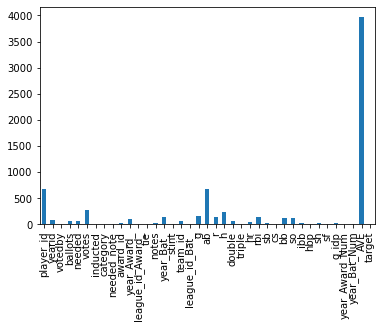

In [ ]:
# Let visualise the cardinality in a bar plot.

player_df_trimmed.nunique().plot(kind='bar')

In [ ]:
# Let inspect unique values of the categorical variables.

# pandas.Series.unique returns unique values of Series object.

print('votedby:')
print(player_df_trimmed['votedby'].unique())
print()
print()
print('award_id:')
print(player_df_trimmed['award_id'].unique())
print()
print('league_id_Award_:')
print(player_df_trimmed['league_id_Award_'].unique())
print()
print('team_id:')
print(player_df_trimmed['team_id'].unique())
print()
print('league_id_Bat_:')
print(player_df_trimmed['league_id_Bat_'].unique())

votedby:
['BBWAA' 'Veterans' 'Nominating Vote' 'Final Ballot' 'Special Election'
 'Old Timers' 'Run Off']


award_id:
['Baseball Magazine All-Star' 'Triple Crown' 'Most Valuable Player'
 'TSN All-Star' 'Pitching Triple Crown' 'TSN Guide MVP'
 'TSN Major League Player of the Year' 'TSN Player of the Year'
 'Babe Ruth Award' 'TSN Pitcher of the Year' 'Cy Young Award'
 'Lou Gehrig Memorial Award' 'Rookie of the Year' 'Gold Glove'
 'World Series MVP' 'TSN Fireman of the Year' 'All-Star Game MVP'
 'Hutch Award' 'Roberto Clemente Award' 'Rolaids Relief Man Award'
 'Silver Slugger' 'NLCS MVP' 'ALCS MVP' 'Branch Rickey Award'
 'TSN Reliever of the Year' 'Hank Aaron Award'
 'Comeback Player of the Year']

league_id_Award_:
['AL' 'ML' 'NL']

team_id:
['DET' 'PHA' 'BOS' 'NYA' 'BSN' 'LS3' 'PIT' 'NY1' 'WS1' 'PHI' 'CLE' 'CL4'
 'SLN' 'CHN' 'SLA' 'CHA' 'WAS' 'BLA' 'BFN' 'PRO' 'BSP' 'CIN' 'IN3' 'BUF'
 'SLF' 'BRF' 'CHF' 'WOR' 'MLA' 'BLF' 'IND' 'BR2' 'HR1' 'HAR' 'BSU' 'IN2'
 'BRO' 'TRN' 'NY4' 'PTF' 'ML1'

### Comparing Features Magnitude

In [ ]:
# Many machine learning algorithms are sensitive to the scale of the features.

# Also, features with bigger value ranges tend to dominate over features with smaller ranges.

# Having features within a similar scale also helps algorithms converge faster, thus 
# improving performance and training times.

# Let calculate the value range of each variable, that is, the difference between the
# maximum and minimum value.

player_df_trimmed[num_cols].max() - player_df_trimmed[num_cols].min()

# Note: The value ranges of the variables are quite different.
# We wil use feature scaling to resolve the feature magnitude's problem!

yearid                                   80
ballots                               503.0
needed                                377.0
votes                                 317.0
year_Award_       0 days 00:00:00.000000131
year_Bat_         0 days 00:00:00.000000136
stint                                     3
g                                       163
ab                                    681.0
r                                     152.0
h                                     254.0
double                                 64.0
triple                                 15.0
hr                                     37.0
rbi                                   159.0
sb                                     20.0
cs                                     12.0
bb                                    132.0
so                                    118.0
ibb                                    20.0
hbp                                     7.0
sh                                     17.0
sf                              

### Drop Features

In [ ]:
# Let remove a subset of input features that are irrelevant to the target variable.

# pandas.DataFrame.drop drops specified labels from rows or columns.
# axis{0 or ‘index’, 1 or ‘columns’}, default 0

player_df_trimmed.drop(['player_id', 'yearid', 'inducted', 'category', 'needed_note', 
                        'year_Award_', 'tie', 'notes', 'year_Bat_', 'stint', 'year_Award_Num',
                       'year_Bat_Num']
          , axis=1, inplace=True)

C:\Users\wilt7\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# Let inspect the dataframe with lesser columns.

# Note: From 38 columns to 26 columns.

player_df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269538 entries, 0 to 393673
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   votedby           269538 non-null  object 
 1   ballots           263895 non-null  float64
 2   needed            247643 non-null  float64
 3   votes             263895 non-null  float64
 4   award_id          269538 non-null  object 
 5   league_id_Award_  269538 non-null  object 
 6   team_id           269538 non-null  object 
 7   league_id_Bat_    269536 non-null  object 
 8   g                 269538 non-null  int64  
 9   ab                262169 non-null  float64
 10  r                 262169 non-null  float64
 11  h                 262169 non-null  float64
 12  double            262169 non-null  float64
 13  triple            262169 non-null  float64
 14  hr                262169 non-null  float64
 15  rbi               262168 non-null  float64
 16  sb                26

### Distinguishing Numerical Variable Distribution

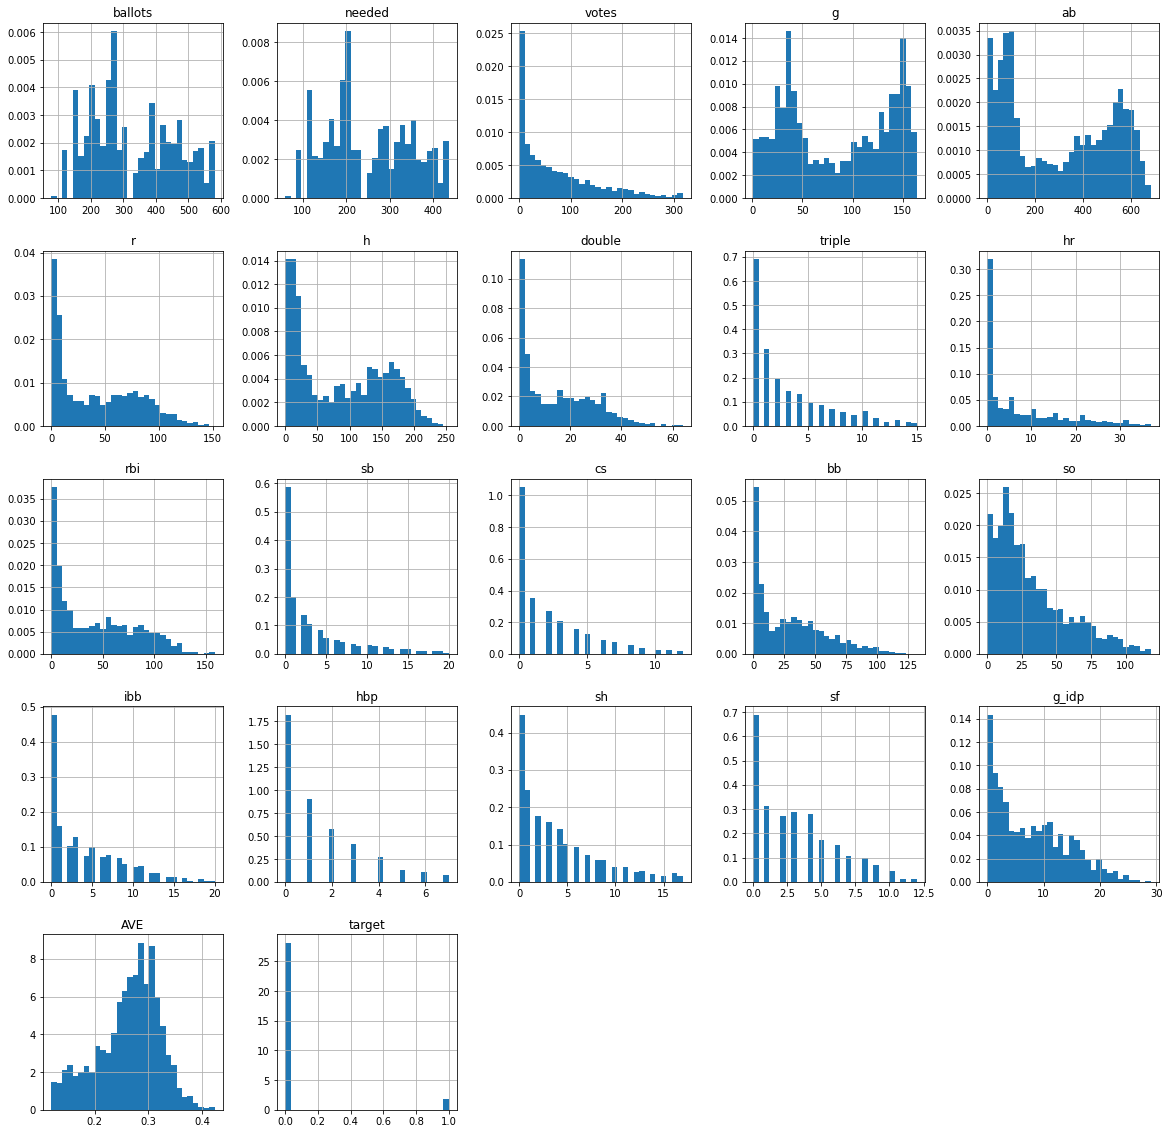

In [ ]:
# Let visualize the numerical variables' distribution with histograms.

# Some machine learning algorithms assumes that independent variables are normally distributed.

player_df_trimmed.hist(bins=30, figsize=(20,20), density=True) # entire dataframe

plt.show()

# Note: All of the numerical variables in the dataset are skewed, I need transform them using 
# proper transformation methods.

### Train And Test Split

In [ ]:
# Separate the data into training (70%) and testing sets (30%).
# Target variable is Item_Outlet_Sales.

# axis = 0 is row & axis = 1 is column}, default 0 row.

X_train, X_test, y_train, y_test = train_test_split(
    player_df_trimmed.drop('target', axis=1), player_df_trimmed['target'], test_size=0.3
    , random_state=0)

# Note: Removed target variable used for prediction - NEVER include in training set!

# player_df_trimmed.drop('target', axis=1) ---> X_train, X_test:
# X_train = 70% of independent variables use to train the model.
# X_test = 30% of independent variables use to make prediction to test model's accuracy.

# player_df_trimmed['target'] ---> y_train, y_test:
# y_train = Dependent variable to be predicted by model (Which is category lobels against independent variables).
# y_test = Category labels for test data to test accuracy between actual & predicted categories.

X_train.shape, X_test.shape # (total rows = 280116 , total columns = 29)

((188676, 26), (80862, 26))

### Missing Value Imputation

In [ ]:
# Let find the percentage of missing data for train set in ascending order.

X_train.isnull().mean().sort_values(ascending=True)

votedby             0.000000
award_id            0.000000
league_id_Award_    0.000000
team_id             0.000000
g                   0.000000
league_id_Bat_      0.000011
ballots             0.020893
votes               0.020893
bb                  0.027810
hr                  0.027810
triple              0.027810
double              0.027810
r                   0.027810
ab                  0.027810
h                   0.027810
rbi                 0.027815
sb                  0.027931
hbp                 0.027990
sh                  0.028589
AVE                 0.047240
so                  0.049323
needed              0.081097
cs                  0.317279
g_idp               0.333609
sf                  0.621118
ibb                 0.630971
dtype: float64

In [ ]:
# Let find the number of missing data for train set in ascending order.

X_train.isnull().sum().sort_values(ascending=True)

votedby                  0
award_id                 0
league_id_Award_         0
team_id                  0
g                        0
league_id_Bat_           2
ballots               3942
votes                 3942
bb                    5247
hr                    5247
triple                5247
double                5247
r                     5247
ab                    5247
h                     5247
rbi                   5248
sb                    5270
hbp                   5281
sh                    5394
AVE                   8913
so                    9306
needed               15301
cs                   59863
g_idp                62944
sf                  117190
ibb                 119049
dtype: int64

In [ ]:
# Let find the percentage of missing data for test set in ascending order.

X_test.isnull().mean().sort_values(ascending=True)

votedby             0.000000
award_id            0.000000
league_id_Award_    0.000000
team_id             0.000000
league_id_Bat_      0.000000
g                   0.000000
ballots             0.021036
votes               0.021036
bb                  0.026242
rbi                 0.026242
hr                  0.026242
triple              0.026242
double              0.026242
h                   0.026242
r                   0.026242
ab                  0.026242
sb                  0.026403
hbp                 0.026415
sh                  0.027034
AVE                 0.046239
so                  0.047958
needed              0.081546
cs                  0.316267
g_idp               0.332814
sf                  0.621318
ibb                 0.630754
dtype: float64

In [ ]:
# Let find the number of missing data for test set in ascending order.

X_test.isnull().sum().sort_values(ascending=True)

votedby                 0
award_id                0
league_id_Award_        0
team_id                 0
league_id_Bat_          0
g                       0
ballots              1701
votes                1701
bb                   2122
rbi                  2122
hr                   2122
triple               2122
double               2122
h                    2122
r                    2122
ab                   2122
sb                   2135
hbp                  2136
sh                   2186
AVE                  3739
so                   3878
needed               6594
cs                  25574
g_idp               26912
sf                  50241
ibb                 51004
dtype: int64

### Implementing Random Sample Imputation For Both Numerical & Categorical Variables

In [ ]:
# Let create a random sample imputer.

# Justification for using this method:
# Random sampling imputation consists of extracting random observations from the pool of 
# available values in the variable. 
# Random sampling imputation preserves the original distribution, which differs from the 
# other imputation techniques and is suitable for numerical and categorical variables.

# The RandomSampleImputer() replaces missing data in each feature with a random sample 
# extracted from the variables in the training set. 
# The RandomSampleImputer() works with both numerical and categorical variables.

imputer = RandomSampleImputer()

# fit the imputer to the train set 

imputer.fit(X_train)

RandomSampleImputer(variables=['votedby', 'ballots', 'needed', 'votes',
                               'award_id', 'league_id_Award_', 'team_id',
                               'league_id_Bat_', 'g', 'ab', 'r', 'h', 'double',
                               'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so',
                               'ibb', 'hbp', 'sh', 'sf', 'g_idp', 'AVE'])

In [ ]:
# let replace (transform) the missing values for both train and test sets.

# Note: transform the data - replace the missing values .
# - transformation performs based on the parameters (imputer) that were computed during fit. 

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# Re-check that null values were replaced for train set.

X_train.isnull().mean()

votedby             0.0
ballots             0.0
needed              0.0
votes               0.0
award_id            0.0
league_id_Award_    0.0
team_id             0.0
league_id_Bat_      0.0
g                   0.0
ab                  0.0
r                   0.0
h                   0.0
double              0.0
triple              0.0
hr                  0.0
rbi                 0.0
sb                  0.0
cs                  0.0
bb                  0.0
so                  0.0
ibb                 0.0
hbp                 0.0
sh                  0.0
sf                  0.0
g_idp               0.0
AVE                 0.0
dtype: float64

In [ ]:
# Re-check that null values were replaced for test set.

X_test.isnull().mean()

votedby             0.0
ballots             0.0
needed              0.0
votes               0.0
award_id            0.0
league_id_Award_    0.0
team_id             0.0
league_id_Bat_      0.0
g                   0.0
ab                  0.0
r                   0.0
h                   0.0
double              0.0
triple              0.0
hr                  0.0
rbi                 0.0
sb                  0.0
cs                  0.0
bb                  0.0
so                  0.0
ibb                 0.0
hbp                 0.0
sh                  0.0
sf                  0.0
g_idp               0.0
AVE                 0.0
dtype: float64

###  Transforming Numerical Variables

In [ ]:
# To evaluate the effect of the transformation on the variable distribution, we will
# create a function that takes a dataframe and a variable name as inputs and plots a
# histogram next to a Q-Q plot.

# scipy.stats.probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False):
# Calculate quantiles for a probability plot, and optionally show the plot

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable 
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

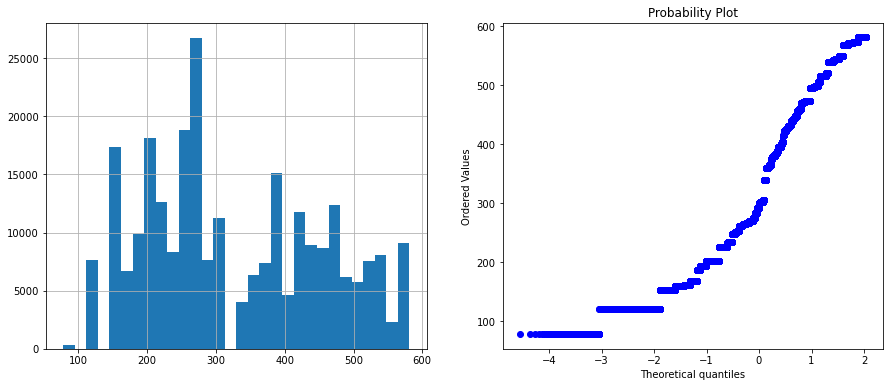

In [ ]:
# Let check original distribution of the ballots variable.

# Note: ballots variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'ballots')

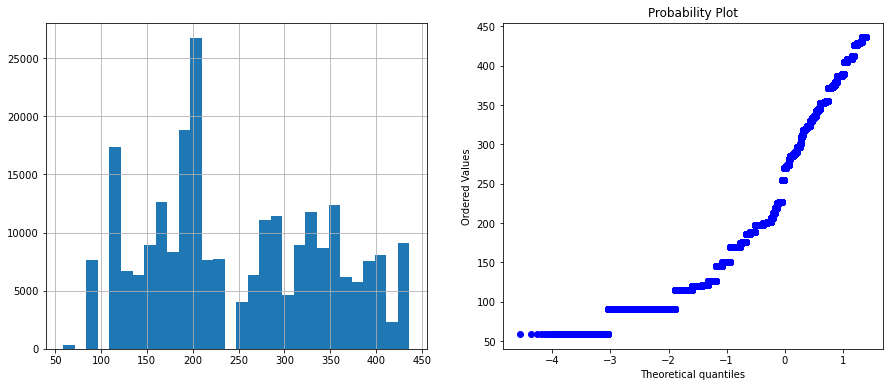

In [ ]:
# Let check original distribution of the needed variable.

# Note: needed variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'needed')

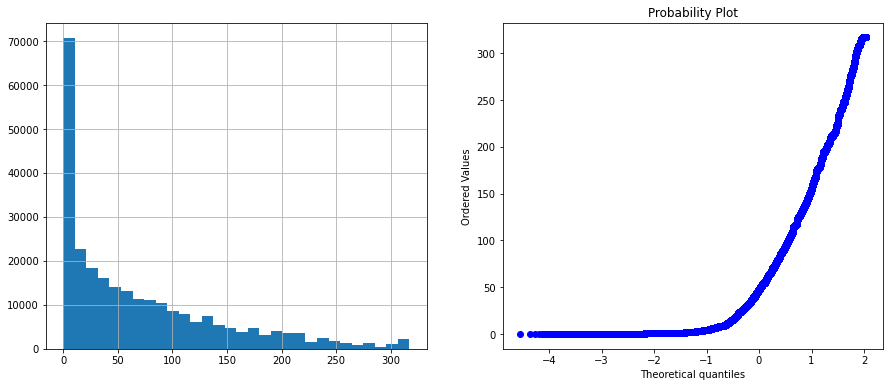

In [ ]:
# Let check original distribution of the votes variable.

# Note: votes variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'votes')

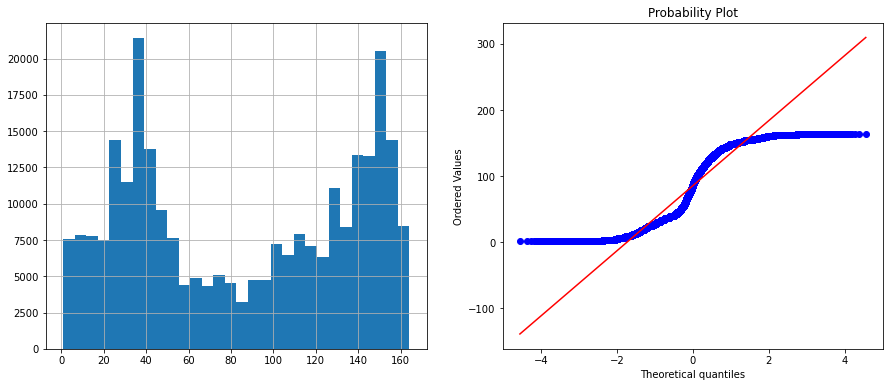

In [ ]:
# Let check original distribution of the g variable.

# Note: g variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'g')

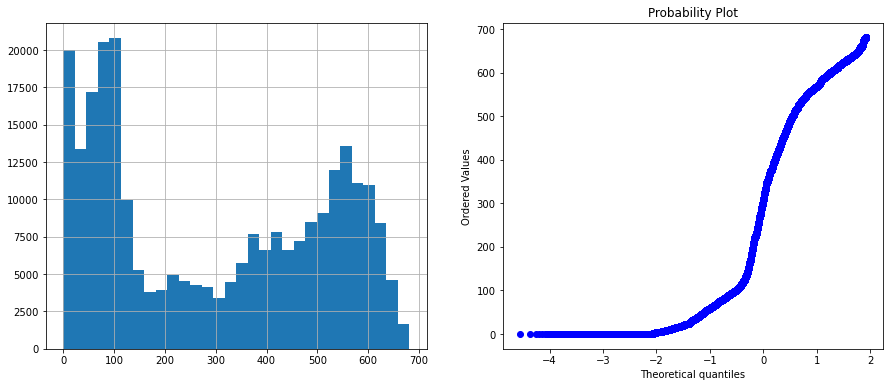

In [ ]:
# Let check original distribution of the ab variable.

# Note: ab variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'ab')

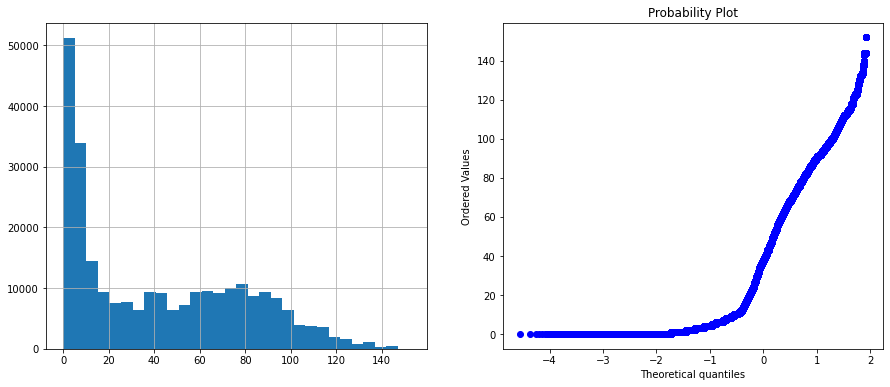

In [ ]:
# Let check original distribution of the r variable.

# Note: r variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'r')

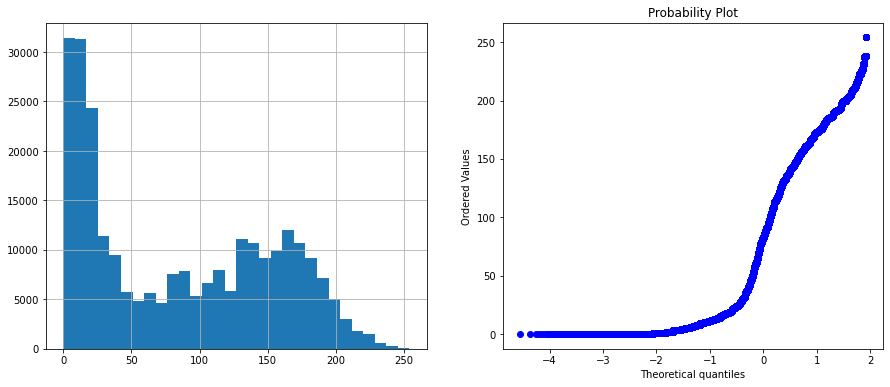

In [ ]:
# Let check original distribution of the h variable.

# Note: h variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'h')

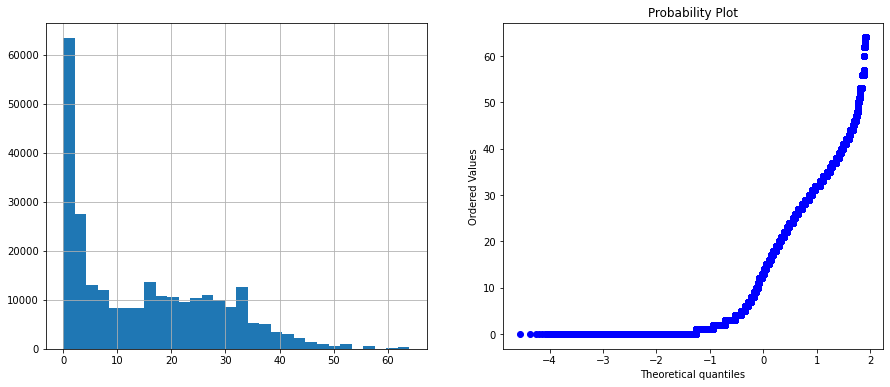

In [ ]:
# Let check original distribution of the double variable.

# Note: double variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'double')

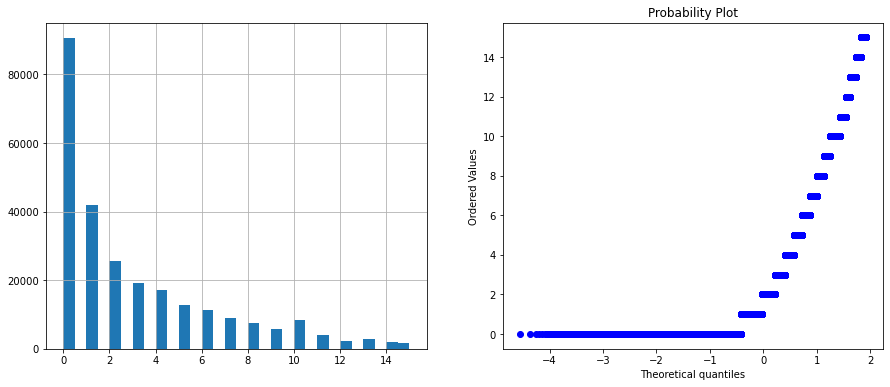

In [ ]:
# Let check original distribution of the triple variable.

# Note: triple variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'triple')

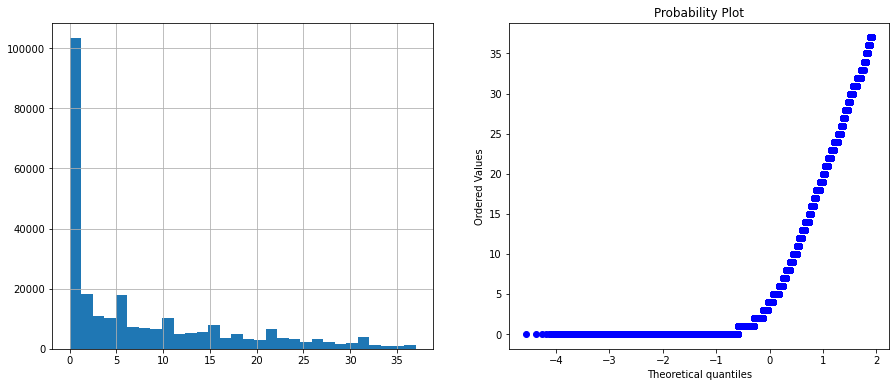

In [ ]:
# Let check original distribution of the hr variable.

# Note: hr variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'hr')

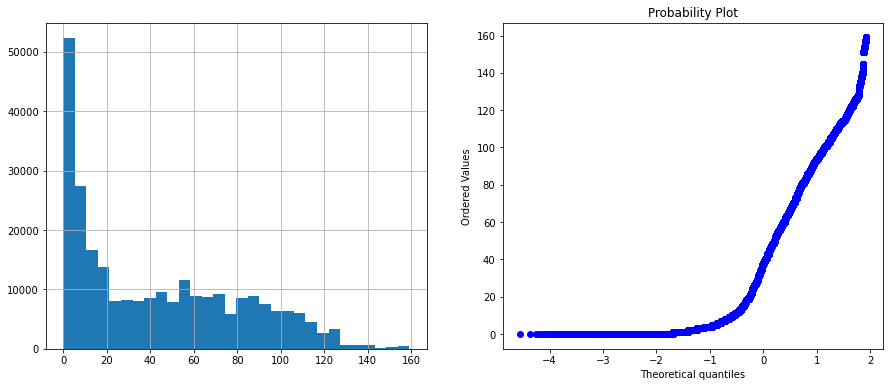

In [ ]:
# Let check original distribution of the rbi variable.

# Note: rbi variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'rbi')

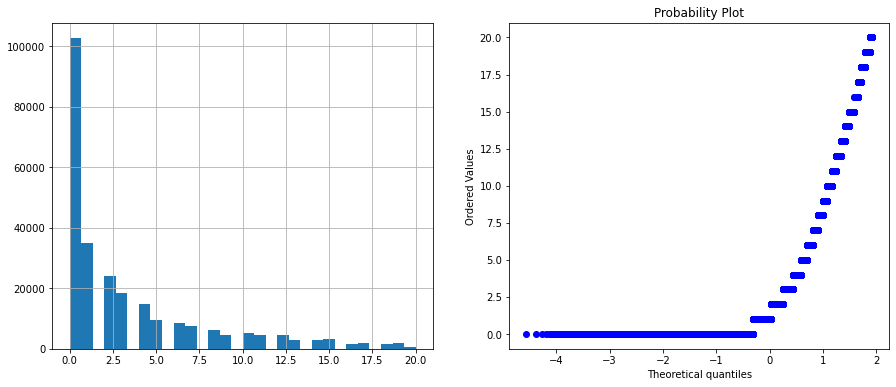

In [ ]:
# Let check original distribution of the sb variable.

# Note: sb variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'sb')

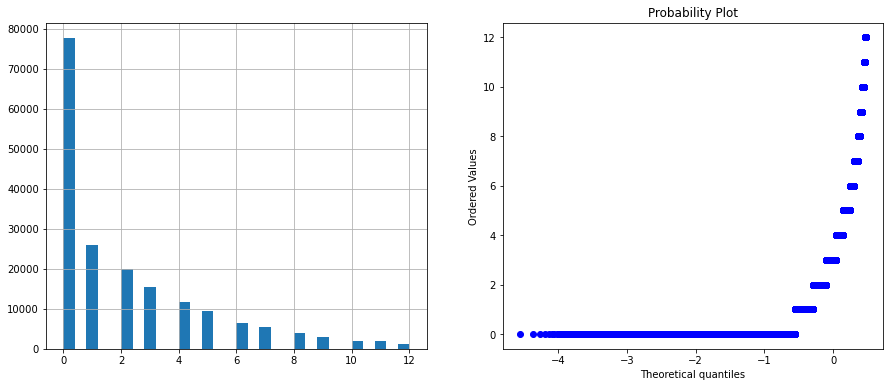

In [ ]:
# Let check original distribution of the cs variable.

# Note: cs variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'cs')

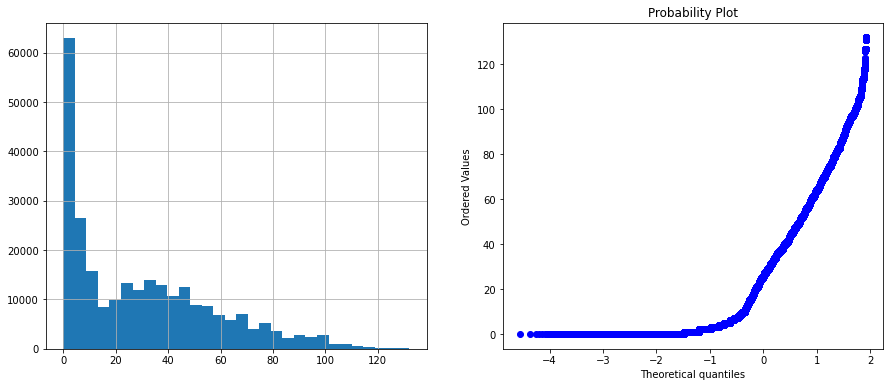

In [ ]:
# Let check original distribution of the bb variable.

# Note: bb variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'bb')

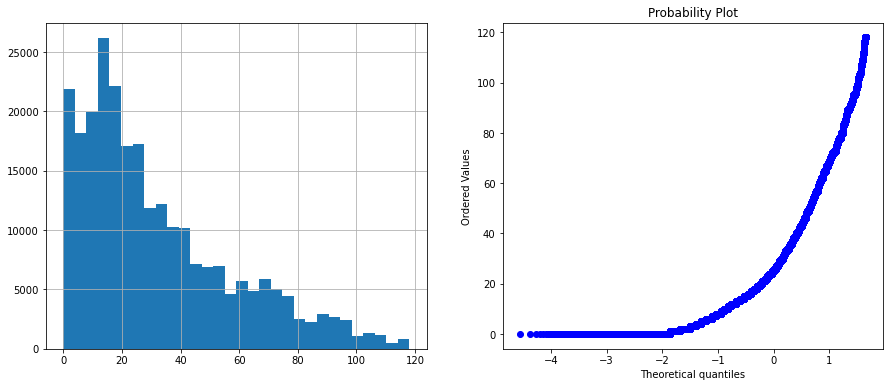

In [ ]:
# Let check original distribution of the so variable.

# Note: so variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'so')

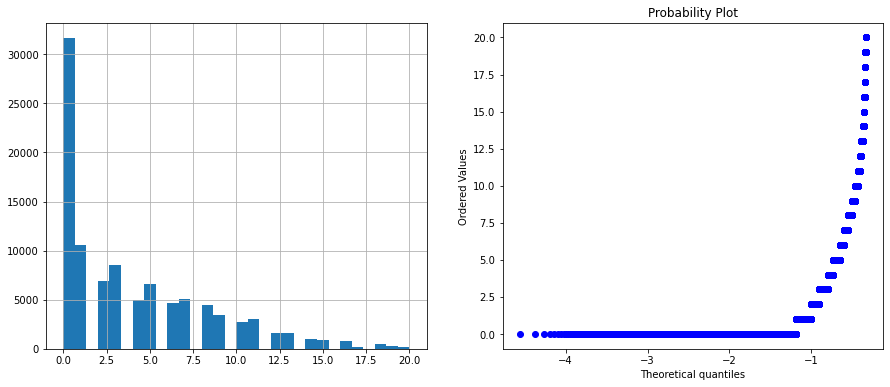

In [ ]:
# Let check original distribution of the ibb variable.

# Note: ibb variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'ibb')

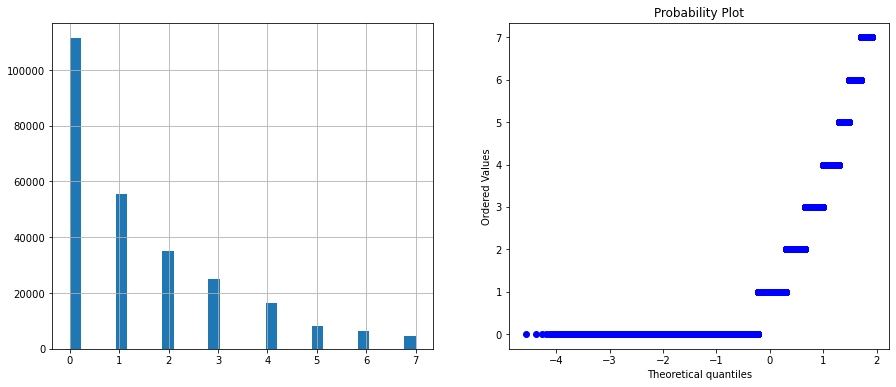

In [ ]:
# Let check original distribution of the hbp variable.

# Note: hbp variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'hbp')

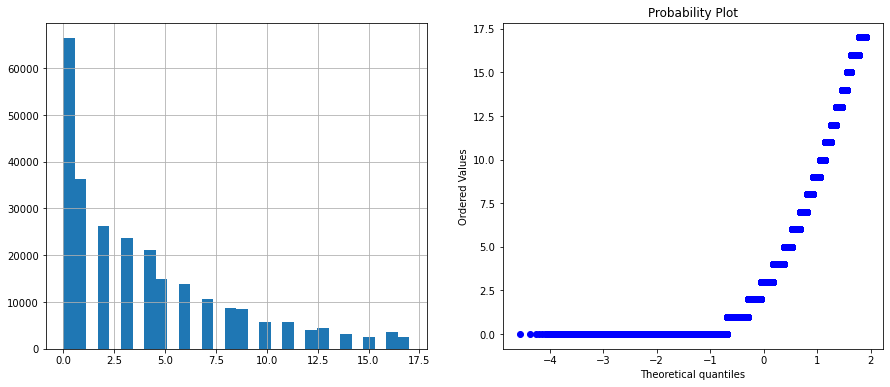

In [ ]:
# Let check original distribution of the sh variable.

# Note: sh variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'sh')

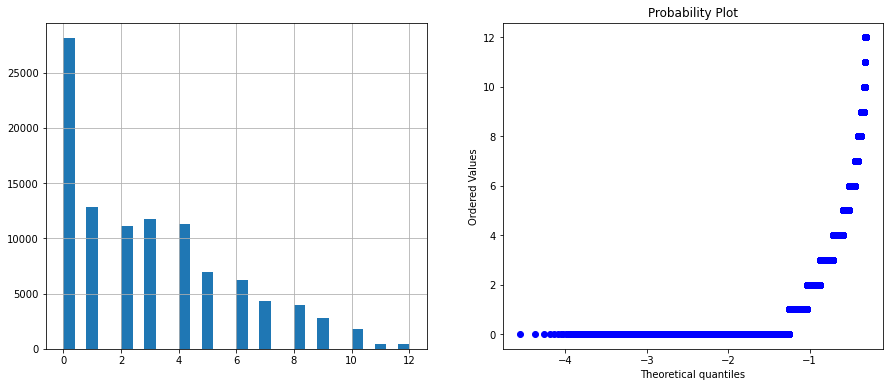

In [ ]:
# Let check original distribution of the sf variable.

# Note: sf variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'sf')

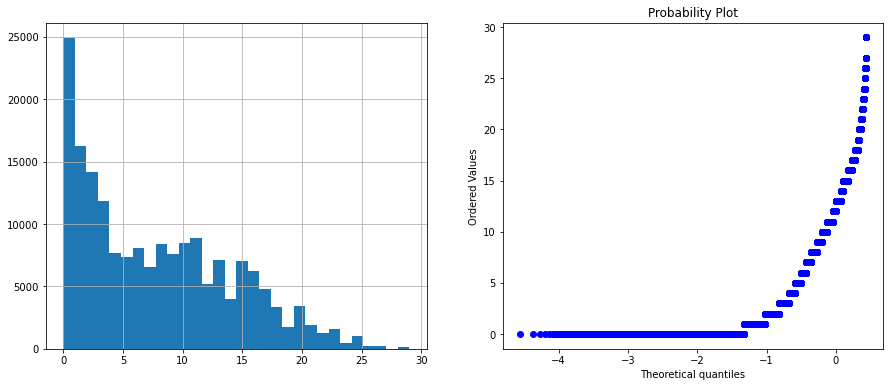

In [ ]:
# Let check original distribution of the g_idp variable.

# Note: g_idp variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'g_idp')

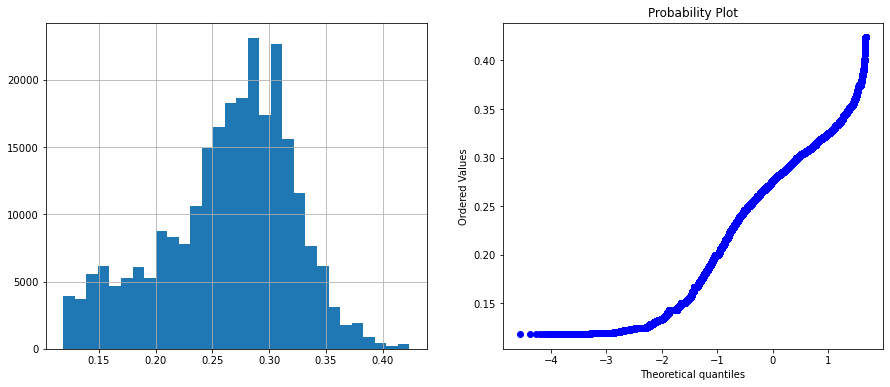

In [ ]:
# Let check original distribution of the AVE variable.

# Note: AVE variable is not normally distributed.

diagnostic_plots(player_df_trimmed, 'AVE')

### Performing Power Transformation On Numerical Variables

In [ ]:
# Exponential or power functions are mathematical transformations to increase the 
# symmetry of the distribution of the features.

# Let start PowerTransformer() with the exponent 0.3 and the variables to transform. 

# PowerTransformer() applies power or exponential transformations to numerical variables.

# variables : list, default=None
# The list of numerical variables that will be transformed. 
# If None, the transformer will automatically find and select all numerical variables.

# exp : float or int, default=0.5
# The power (or exponent).
# exp = 1/3 (0.3) for cube root 
# exp = 1/2 (0.5) for square root

pt = et = PowerTransformer(variables = ['ballots', 'needed', 'votes', 'g', 'ab',
                                        'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb',
                                        'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf', 'g_idp',
                                        'AVE'])

# Let fit transformer to the list of variables. 

# Note: fit learns the optimal lambda for Yeo-Johnson transformation to find the optimal lambda!

pt.fit(X_train)

PowerTransformer(variables=['ballots', 'needed', 'votes', 'g', 'ab', 'r', 'h',
                            'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb',
                            'so', 'ibb', 'hbp', 'sh', 'sf', 'g_idp', 'AVE'])

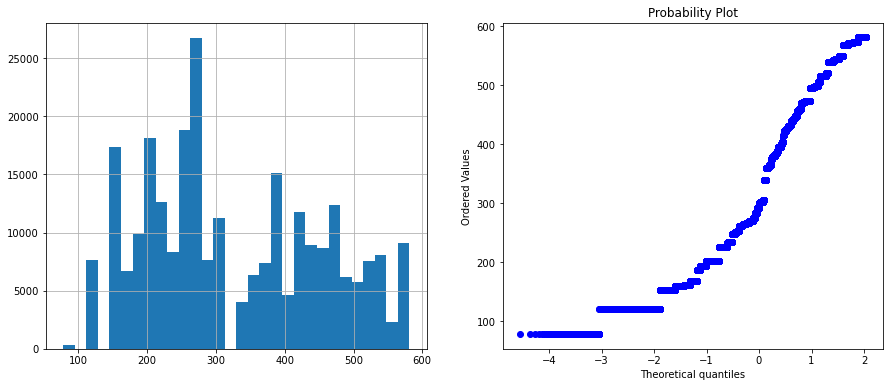

In [ ]:
# Let check the distribution of the ballots variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'ballots')

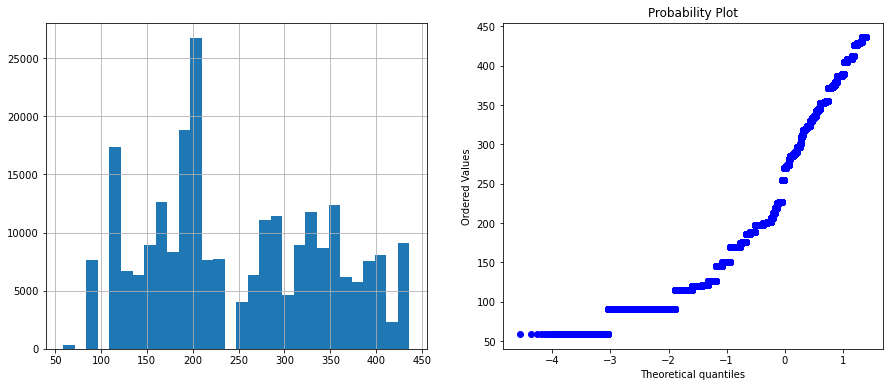

In [ ]:
# Let check the distribution of the needed variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'needed')

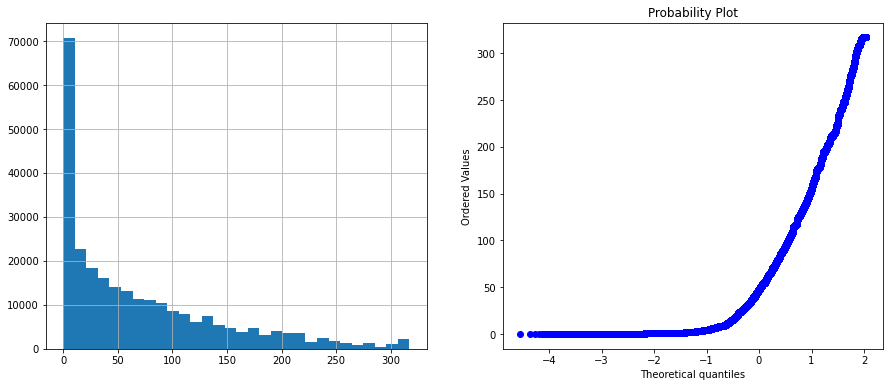

In [ ]:
# Let check the distribution of the votes variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'votes')

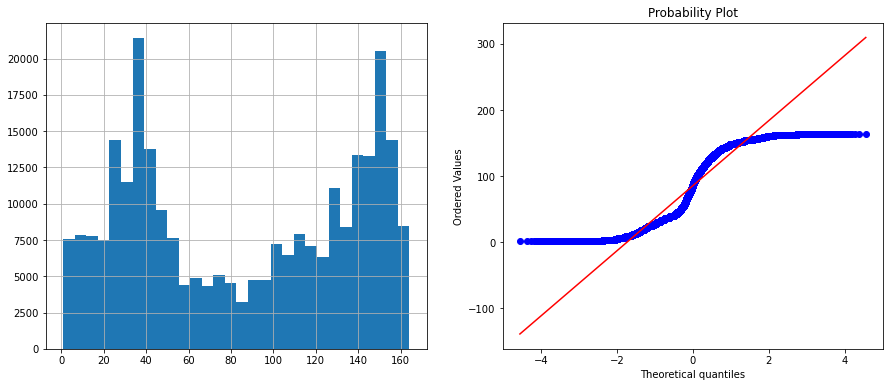

In [ ]:
# Let check the distribution of the g variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'g')

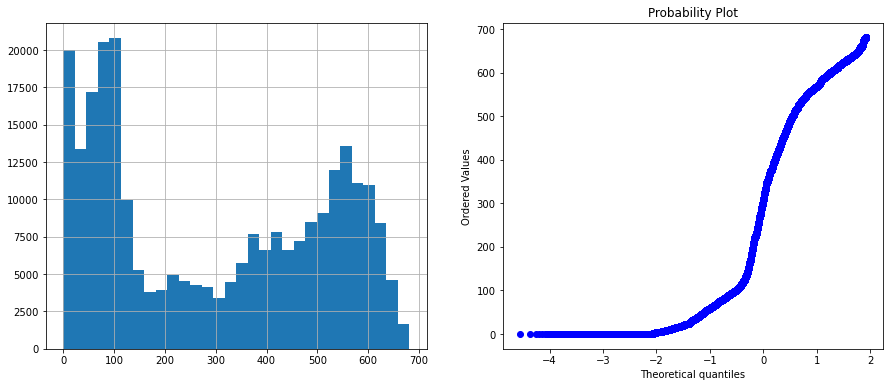

In [ ]:
# Let check the distribution of the ab variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'ab')

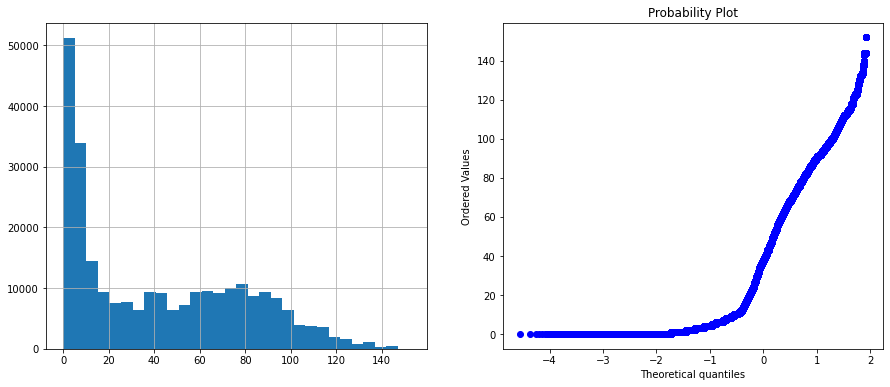

In [ ]:
# Let check the distribution of the r variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'r')

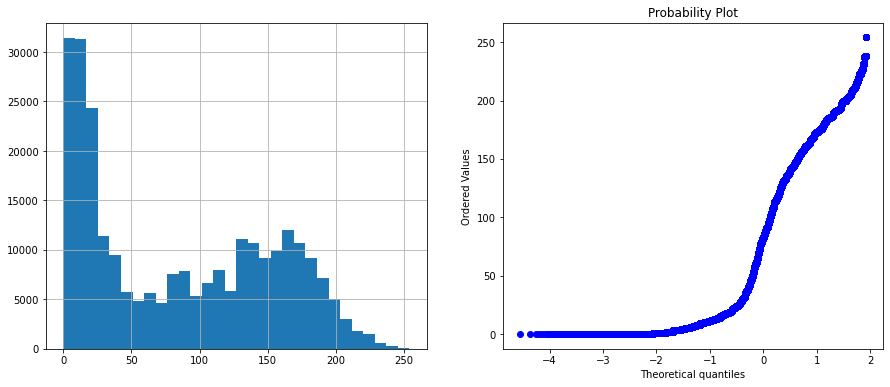

In [ ]:
# Let check the distribution of the h variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'h')

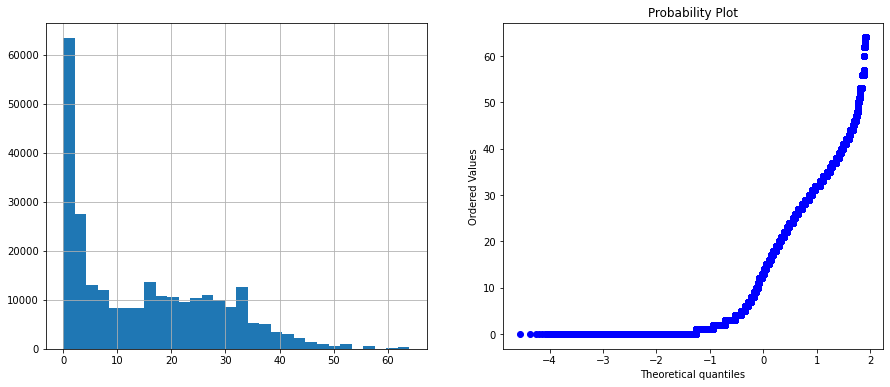

In [ ]:
# Let check the distribution of the double variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'double')

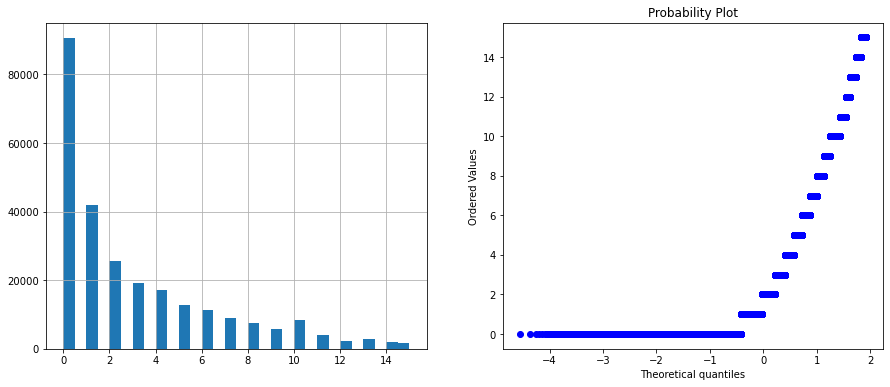

In [ ]:
# Let check the distribution of the triple variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'triple')

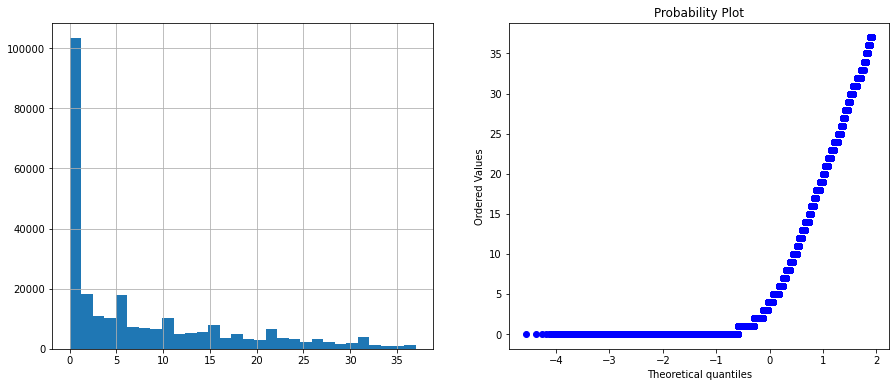

In [ ]:
# Let check the distribution of the hr variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'hr')

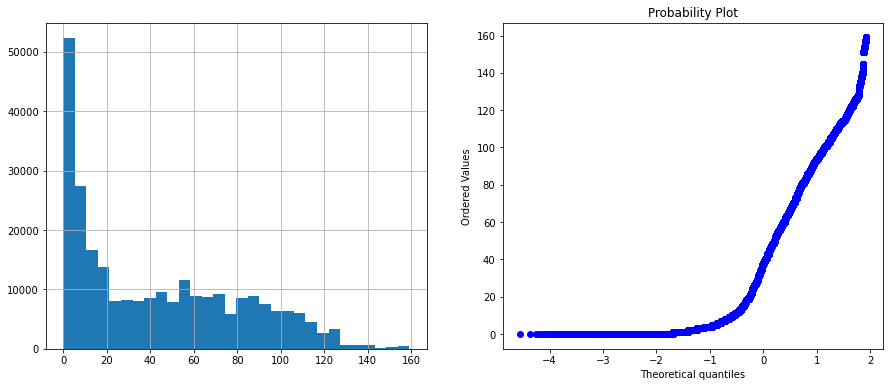

In [ ]:
# Let check the distribution of the rbi variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'rbi')

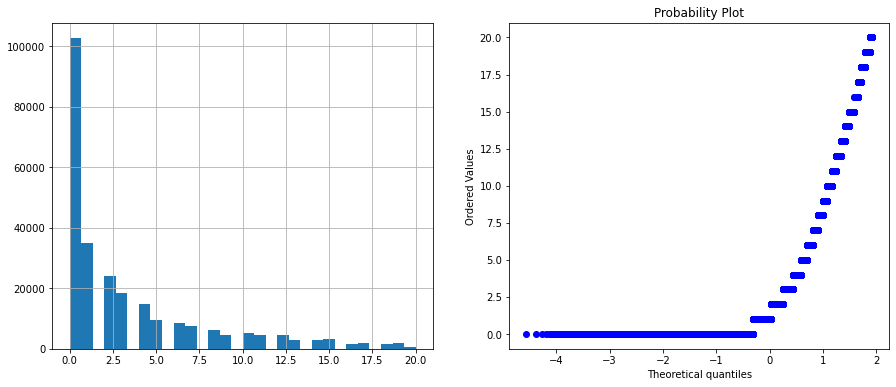

In [ ]:
# Let check the distribution of the sb variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'sb')

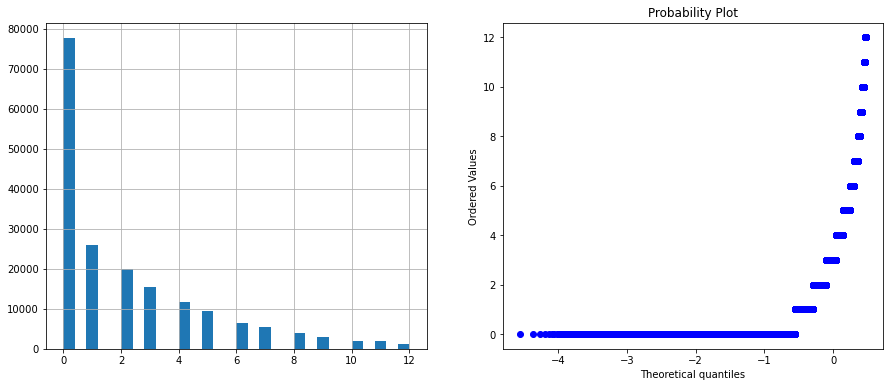

In [ ]:
# Let check the distribution of the cs variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'cs')

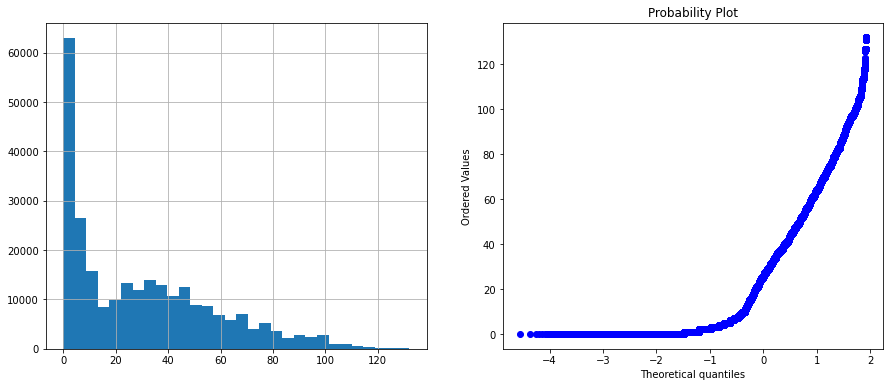

In [ ]:
# Let check the distribution of the bb variable after the transformation with the
# diagnostic function we created.

# Note: Improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'bb')

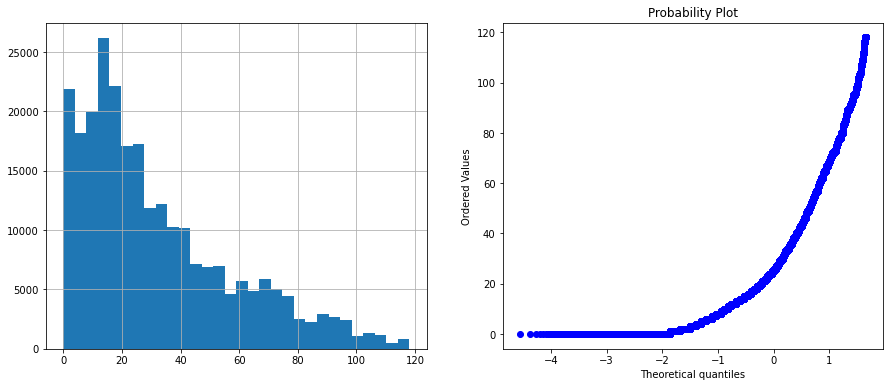

In [ ]:
# Let check the distribution of the so variable after the transformation with the
# diagnostic function we created.

# Note: Improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'so')

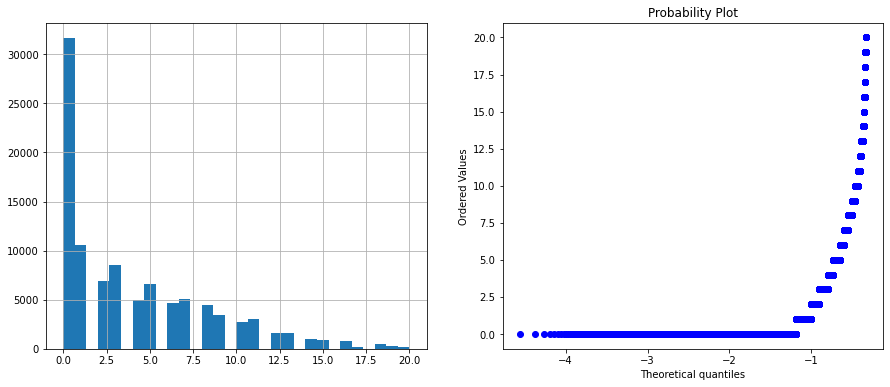

In [ ]:
# Let check the distribution of the ibb variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'ibb')

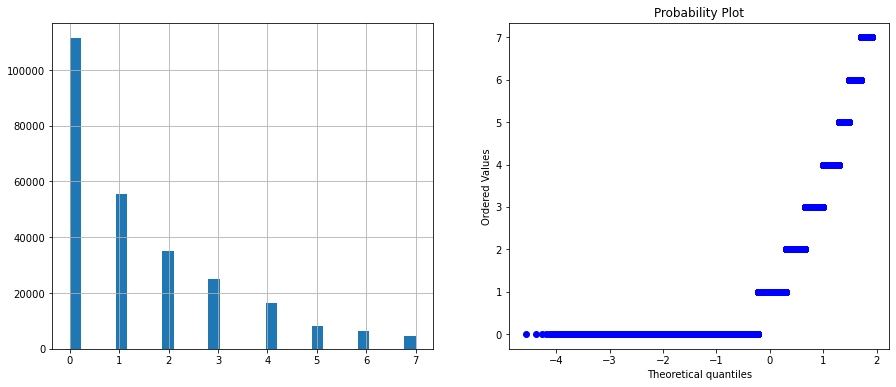

In [ ]:
# Let check the distribution of the hbp variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'hbp')

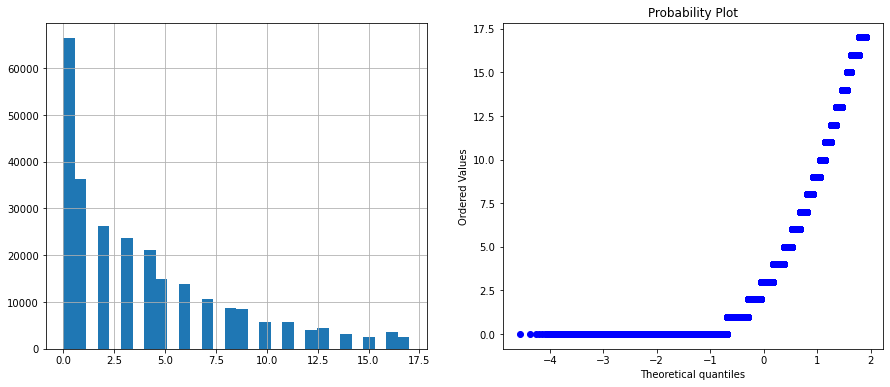

In [ ]:
# Let check the distribution of the sh variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'sh')

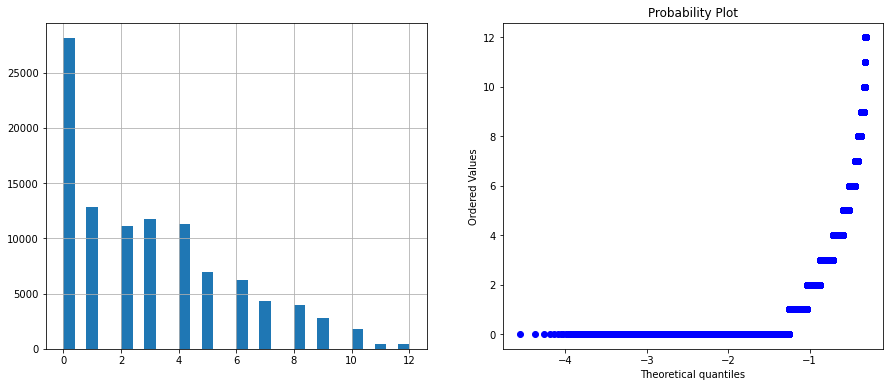

In [ ]:
# Let check the distribution of the sf variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'sf')

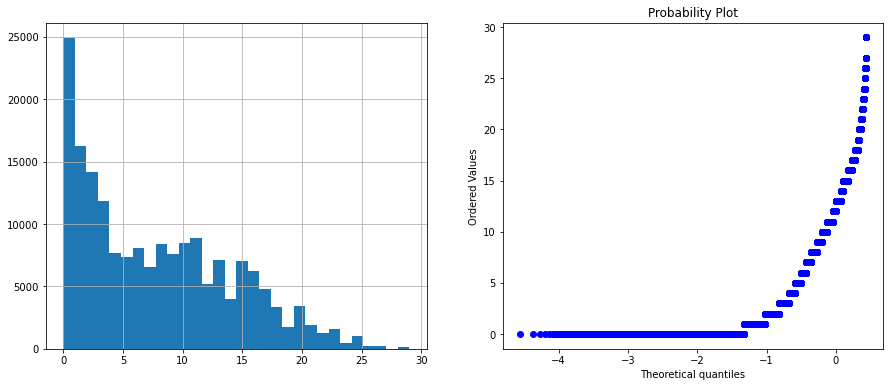

In [ ]:
# Let check the distribution of the g_idp variable after the transformation with the
# diagnostic function we created.

# Note: Slightly improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'g_idp')

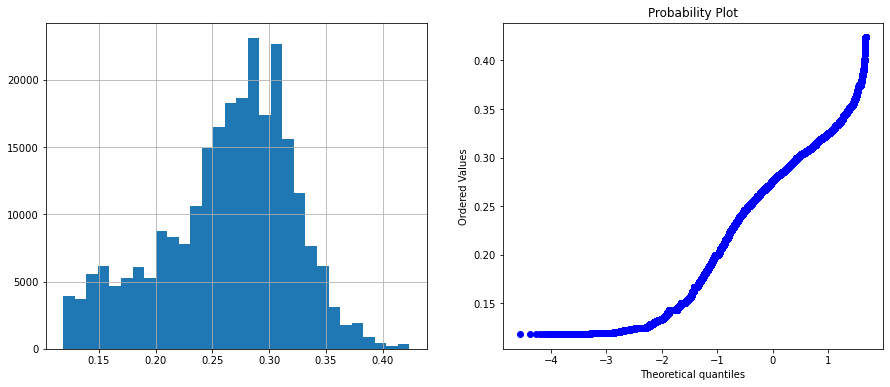

In [ ]:
# Let check the distribution of the AVE variable after the transformation with the
# diagnostic function we created.

# Note: Improved but still not normally distributed.

diagnostic_plots(player_df_trimmed, 'AVE')

### Creating Binary Variables Through One-Hot Encoding

In [ ]:
# let set up the encoder to return k-1 binary variables.

# OneHotEncoder consists in replacing the categorical variable by a combination of binary 
# variables which take value 0 or 1, to indicate if a certain category is present in an observation. 
# The binary variables are also known as dummy variables.

# top_categories : int, default=None
# If None, a dummy variable will be created for each category of the variable. 
# Alternatively, we can indicate in top_categories number of most frequent categories to encode. 
# In this case, dummy variables will be created only for those popular categories 
# and the rest will be ignored, i.e., they will show the value 0 in all the binary variables.

# drop_last : boolean, default=False
# Only used if top_categories = None. 
# It indicates whether to create dummy variables for all the categories (k dummies), 
# or if set to True, it will ignore the last binary variable of the list (k-1 dummies).

ohe_enc = OneHotEncoder(
    top_categories=None, 
    drop_last=True)  # to return k-1, false to return k

In [ ]:
# Let fit the encoder to the train set so that it learns categories and variables to encode.

ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True,
              variables=['votedby', 'award_id', 'league_id_Award_', 'team_id',
                         'league_id_Bat_'])

In [ ]:
# Let encode (transform) the categorical variables in train and test sets.

X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

In [ ]:
# let inspect the encoded train set.

X_train_enc.head()

,ballots,needed,votes,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,AVE,votedby_BBWAA,votedby_Nominating Vote,votedby_Old Timers,votedby_Run Off,votedby_Veterans,votedby_Final Ballot,award_id_Baseball Magazine All-Star,award_id_TSN Major League Player of the Year,award_id_TSN All-Star,award_id_Gold Glove,award_id_TSN Player of the Year,award_id_World Series MVP,award_id_Lou Gehrig Memorial Award,award_id_TSN Reliever of the Year,award_id_Hutch Award,award_id_Most Valuable Player,award_id_Silver Slugger,award_id_NLCS MVP,award_id_TSN Pitcher of the Year,award_id_Rookie of the Year,award_id_Pitching Triple Crown,award_id_Cy Young Award,award_id_All-Star Game MVP,award_id_Babe Ruth Award,award_id_TSN Fireman of the Year,award_id_TSN Guide MVP,award_id_Roberto Clemente Award,award_id_Rolaids Relief Man Award,award_id_Triple Crown,award_id_ALCS MVP,award_id_Branch Rickey Award,award_id_Comeback Player of the Year,league_id_Award__AL,league_id_Award__ML,team_id_WS1,team_id_NYN,team_id_SLN,team_id_NY1,team_id_BRO,team_id_BOS,team_id_PIT,team_id_NYA,team_id_CHN,team_id_DET,team_id_CLE,team_id_BAL,team_id_PHA,team_id_SDN,team_id_CHA,team_id_CIN,team_id_LAN,team_id_TOR,team_id_KC1,team_id_PHI,team_id_FLO,team_id_BSN,team_id_OAK,team_id_CAL,team_id_SLA,team_id_ATL,team_id_IND,team_id_MON,team_id_MIN,team_id_TEX,team_id_HOU,team_id_KCA,team_id_SEA,team_id_ML1,team_id_BLA,team_id_SFN,team_id_ML4,team_id_ANA,team_id_COL,team_id_ARI,team_id_BLF,team_id_TBA,team_id_BFN,team_id_SLF,team_id_LS3,team_id_LAA,team_id_CL4,team_id_WAS,team_id_CHF,team_id_HR1,team_id_BRF,team_id_BUF,team_id_WS2,team_id_TRN,team_id_MIL,team_id_PRO,team_id_IN3,team_id_BSU,team_id_BSP,team_id_MLA,team_id_NY4,team_id_SE1,team_id_WOR,team_id_BR2,team_id_HAR,league_id_Bat__AL,league_id_Bat__NL,league_id_Bat__FL,league_id_Bat__UA,league_id_Bat__PL
128645,251.0,189.0,135.0,63,227.0,23.0,55.0,10.0,4.0,0.0,25.0,4.0,0.0,22.0,27.0,11.0,0.0,10.0,6.0,2.0,0.242291,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
245185,413.0,310.0,96.0,136,496.0,62.0,132.0,28.0,2.0,14.0,61.0,4.0,3.0,30.0,64.0,5.0,0.0,1.0,7.0,15.0,0.266129,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
103962,226.0,170.0,145.0,27,66.0,8.0,15.0,1.0,0.0,1.0,5.0,0.0,3.0,3.0,11.0,0.0,0.0,9.0,0.0,2.0,0.227273,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
33924,247.0,186.0,32.0,123,475.0,68.0,153.0,20.0,5.0,6.0,58.0,3.0,0.0,40.0,23.0,0.0,0.0,9.0,3.0,10.0,0.322105,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
57544,153.0,115.0,33.0,34,90.0,10.0,15.0,3.0,0.0,0.0,9.0,0.0,6.0,6.0,26.0,2.0,0.0,6.0,2.0,1.0,0.166667,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# let inspect the encoded test set.

X_test_enc.head()

,ballots,needed,votes,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,AVE,votedby_BBWAA,votedby_Nominating Vote,votedby_Old Timers,votedby_Run Off,votedby_Veterans,votedby_Final Ballot,award_id_Baseball Magazine All-Star,award_id_TSN Major League Player of the Year,award_id_TSN All-Star,award_id_Gold Glove,award_id_TSN Player of the Year,award_id_World Series MVP,award_id_Lou Gehrig Memorial Award,award_id_TSN Reliever of the Year,award_id_Hutch Award,award_id_Most Valuable Player,award_id_Silver Slugger,award_id_NLCS MVP,award_id_TSN Pitcher of the Year,award_id_Rookie of the Year,award_id_Pitching Triple Crown,award_id_Cy Young Award,award_id_All-Star Game MVP,award_id_Babe Ruth Award,award_id_TSN Fireman of the Year,award_id_TSN Guide MVP,award_id_Roberto Clemente Award,award_id_Rolaids Relief Man Award,award_id_Triple Crown,award_id_ALCS MVP,award_id_Branch Rickey Award,award_id_Comeback Player of the Year,league_id_Award__AL,league_id_Award__ML,team_id_WS1,team_id_NYN,team_id_SLN,team_id_NY1,team_id_BRO,team_id_BOS,team_id_PIT,team_id_NYA,team_id_CHN,team_id_DET,team_id_CLE,team_id_BAL,team_id_PHA,team_id_SDN,team_id_CHA,team_id_CIN,team_id_LAN,team_id_TOR,team_id_KC1,team_id_PHI,team_id_FLO,team_id_BSN,team_id_OAK,team_id_CAL,team_id_SLA,team_id_ATL,team_id_IND,team_id_MON,team_id_MIN,team_id_TEX,team_id_HOU,team_id_KCA,team_id_SEA,team_id_ML1,team_id_BLA,team_id_SFN,team_id_ML4,team_id_ANA,team_id_COL,team_id_ARI,team_id_BLF,team_id_TBA,team_id_BFN,team_id_SLF,team_id_LS3,team_id_LAA,team_id_CL4,team_id_WAS,team_id_CHF,team_id_HR1,team_id_BRF,team_id_BUF,team_id_WS2,team_id_TRN,team_id_MIL,team_id_PRO,team_id_IN3,team_id_BSU,team_id_BSP,team_id_MLA,team_id_NY4,team_id_SE1,team_id_WOR,team_id_BR2,team_id_HAR,league_id_Bat__AL,league_id_Bat__NL,league_id_Bat__FL,league_id_Bat__UA,league_id_Bat__PL
321604,470.0,353.0,18.0,99,204.0,19.0,45.0,6.0,3.0,1.0,18.0,3.0,4.0,5.0,33.0,0.0,0.0,5.0,0.0,4.0,0.220588,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
186474,269.0,202.0,1.0,13,25.0,2.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,3.0,16.0,0.0,0.0,1.0,6.0,0.160000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
321751,470.0,353.0,2.0,34,0.0,57.0,19.0,24.0,0.0,1.0,106.0,0.0,0.0,3.0,0.0,7.0,3.0,15.0,0.0,4.0,0.211538,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
106131,153.0,115.0,65.0,106,372.0,45.0,92.0,11.0,1.0,9.0,54.0,0.0,3.0,48.0,32.0,12.0,2.0,2.0,2.0,7.0,0.247312,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
241328,388.0,291.0,55.0,103,376.0,45.0,118.0,19.0,5.0,11.0,66.0,1.0,1.0,22.0,60.0,6.0,0.0,4.0,4.0,9.0,0.313830,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Variable Discretization /Binning:  Sorting The Variable Values In Intervals of Equal Frequency

A discretization transform will map numerical variables onto discrete values.

Binning, also known as categorization or discretization, is the process of translating a quantitative variable into a set of two or more qualitative buckets.


In [ ]:
# Let sort the variable values in intervals of equal frequency

# Equal-frequency discretization divides the values of the variable into intervals that carry 
# the same proportion of observations. The interval width is determined by quantiles, and 
# therefore different intervals may have different widths.

# Note: This discretization technique is particularly useful for skewed variables as 
# it spreads the observations over the different bins equally.

# With Feature-engine, we can perform equal-frequency discretization in fewer steps 
# and for many variables at the time.

# Let create an equal-frequency discretizer to sort the values of three continuous
# variables into 10 quantiles.

# The EqualFrequencyDiscretiser() divides continuous numerical variables into contiguous equal 
# frequency intervals, that is, intervals that contain approximately same proportion of observations.

# q : int, default=10
# Desired number of equal frequency intervals / bins. 
# In other words the number of quantiles in which the variables should be divided.

# variables : list
# The list of numerical variables that will be discretised. 
# If None, the EqualFrequencyDiscretiser() will select all numerical variables.

disc = EqualFrequencyDiscretiser(q=10, variables = ['so', 'AVE']) 

# Let fit the discretizer to train set so that it learns the quantile limits for each variable.

disc.fit(X_train_enc)

EqualFrequencyDiscretiser(variables=['so', 'AVE'])

In [ ]:
# The transformer stores the limits of the intervals for each variable in a dictionary 
# in its disc.binner_dict_ attribute.

disc.binner_dict_

{'so': [-inf, 5.0, 10.0, 14.0, 18.0, 24.0, 31.0, 40.0, 54.0, 72.0, inf],
 'AVE': [-inf,
  0.1728395061728395,
  0.21153846153846154,
  0.2413793103448276,
  0.25806451612903225,
  0.2722222222222222,
  0.2848605577689243,
  0.2996632996632997,
  0.3108108108108108,
  0.3277027027027027,
  inf]}

In [ ]:
# Let transform the variables in the train and test sets.

X_train_discret = disc.transform(X_train_enc)
X_test_discret = disc.transform(X_test_enc)

Text(0, 0.5, 'Number of observations per bin')

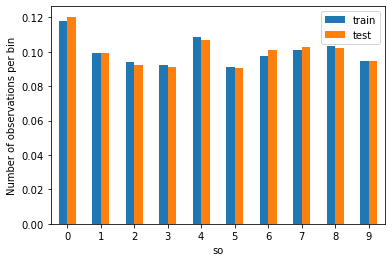

In [ ]:
# For so variable.

# Let plot the proportion of observations across Item_Weight intervals in the train and test sets.

t1 = X_train_discret.groupby(['so'])['so'].count() / len(X_train_discret)
t2 = X_test_discret.groupby(['so'])['so'].count() / len(X_test_discret)

# concatenate aggregated views:

# pandas.concat concatenates pandas objects along a particular axis with optional 
# set logic along the other axes.

# objs : a sequence or mapping of Series or DataFrame objects.
# If a mapping is passed, the sorted keys will be used as the keys argument, 
# unless it is passed, in which case the values will be selected (see below). 
# Any None objects will be dropped silently unless they are all 
# None in which case a ValueError will be raised.

# axis : {0/’index’, 1/’columns’}, default 0
# The axis to concatenate along.

tmp = pd.concat([t1, t2], axis=1)

# pandas.DataFrame.columns creates column labels of the DataFrame.

tmp.columns = ['train', 'test']

# plot bar chart to visulaise frequency for each bin/interval 

# Note: X test bins=intervals : derived from above X train, 
# thus different intervals may have vastly different widths 

tmp.plot.bar()

# add xticks & ylabel

plt.xticks(rotation=0) # number of intervals (bins)
plt.ylabel('Number of observations per bin')

# IMPORTANCE: if the distributions in train and test set are similar, yes it is similar 
# propotion of observations in the different Item_Weight intervals in the train and test set!

Text(0, 0.5, 'Number of observations per bin')

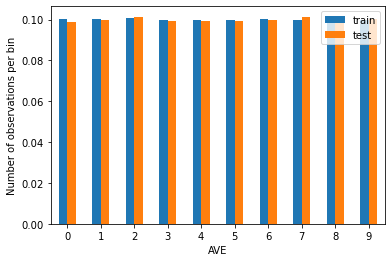

In [ ]:
# For AVE variable.

# Let plot the proportion of observations across Item_Weight intervals in the train and test sets.

t3 = X_train_discret.groupby(['AVE'])['AVE'].count() / len(X_train_discret)
t4 = X_test_discret.groupby(['AVE'])['AVE'].count() / len(X_test_discret)

# concatenate aggregated views:

# pandas.concat concatenates pandas objects along a particular axis with optional 
# set logic along the other axes.

# objs : a sequence or mapping of Series or DataFrame objects.
# If a mapping is passed, the sorted keys will be used as the keys argument, 
# unless it is passed, in which case the values will be selected (see below). 
# Any None objects will be dropped silently unless they are all 
# None in which case a ValueError will be raised.

# axis : {0/’index’, 1/’columns’}, default 0
# The axis to concatenate along.

tmp = pd.concat([t3, t4], axis=1)

# pandas.DataFrame.columns creates column labels of the DataFrame.

tmp.columns = ['train', 'test']

# plot bar chart to visulaise frequency for each bin/interval 

# Note: X test bins=intervals : derived from above X train, 
# thus different intervals may have vastly different widths 

tmp.plot.bar()

# add xticks & ylabel

plt.xticks(rotation=0) # number of intervals (bins)
plt.ylabel('Number of observations per bin')

# IMPORTANCE: if the distributions in train and test set are similar, yes it is similar 
# propotion of observations in the different Item_Weight intervals in the train and test set!

### Variable Discretization /Binning: Performing Discretization Followed By Categorical Encoding

After discretization, the intervals of the variable can be treated as a discrete numerical variable, or as categories in a categorical variable. If treated as categorical,
we can follow up the discretization by reordering the intervals according to the target value.

In [ ]:
# Let create an equal-frequency discretizer using Feature-engine to divide three
# continuous variables into 10 quantiles.

# The EqualFrequencyDiscretiser() divides continuous numerical variables into contiguous equal 
# frequency intervals, that is, intervals that contain approximately same proportion of observations.

# q : int, default=10
# Desired number of equal frequency intervals / bins. 
# In other words the number of quantiles in which the variables should be divided.

# variables : list
# The list of numerical variables that will be discretised. 
# If None, the EqualFrequencyDiscretiser() will select all numerical variables.

# return_object : bool, default=False
# Whether the numbers in the discrete variable should be returned as numeric or as object. 
# The decision is made by the user based on whether they would like to proceed the engineering 
# of the variable as if it was numerical or categorical.

disc = EqualFrequencyDiscretiser(
    q=10, variables=['so', 'AVE'], return_object=True) 

# Let fit the discretizer to the train set so that it learns the interval limits.

disc.fit(X_train_discret)

EqualFrequencyDiscretiser(return_object=True, variables=['so', 'AVE'])

In [ ]:
# Let discretize (transform) the variables in the train and test sets.

X_train_discret1 = disc.transform(X_train_discret)
X_test_discret1 = disc.transform(X_test_discret)

Text(0, 0.5, 'mean of target')

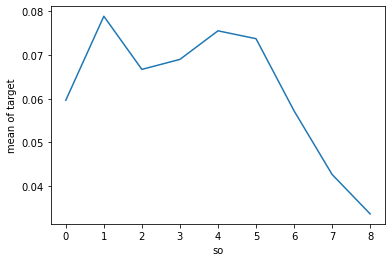

In [ ]:
# Let concatenate the transformed train set with the target, and plot the target
# mean per interval of the so varible.

# Note: so has been bined into 10 quantiles/intervals/bins according to the target mean!

# pandas.concat concatenates pandas objects along a particular axis with optional 
# set logic along the other axes.

# objs : a sequence or mapping of Series or DataFrame objects
# If a mapping is passed, the sorted keys will be used as the keys argument, 
# unless it is passed, in which case the values will be selected (see below). 
# Any None objects will be dropped silently unless they are all 
# None in which case a ValueError will be raised.

# axis : {0/’index’, 1/’columns’}, default 0
# The axis to concatenate along.

pd.concat([X_train_discret1, y_train], axis=1).groupby('so')['target'].mean().plot() 

# Note: line chart shows the target mean (target) according to each (so) bins 0, 1, 2, 3 ,4..

# add ylabel

plt.ylabel('mean of target')

# IMPORTANCE: output of the preceding code block, we can see that the relationship
# between so intervals and the target is not monotonic.

Text(0, 0.5, 'mean of target')

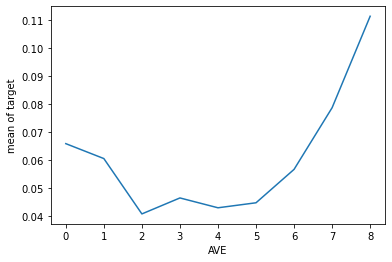

In [ ]:
# Let concatenate the transformed train set with the target, and plot the target
# mean per interval of the AVE varible.

# Note: AVE has been bined into 10 quantiles/intervals/bins according to the target mean!

# pandas.concat concatenates pandas objects along a particular axis with optional 
# set logic along the other axes.

# objs : a sequence or mapping of Series or DataFrame objects
# If a mapping is passed, the sorted keys will be used as the keys argument, 
# unless it is passed, in which case the values will be selected (see below). 
# Any None objects will be dropped silently unless they are all 
# None in which case a ValueError will be raised.

# axis : {0/’index’, 1/’columns’}, default 0
# The axis to concatenate along.

pd.concat([X_train_discret1, y_train], axis=1).groupby('AVE')['target'].mean().plot() 

# Note: line chart shows the target mean (Item_Outlet_Sales) according to each (Item_Weight) bins 0, 1, 2, 3 ,4..

# add ylabel

plt.ylabel('mean of target')

# IMPORTANCE: output of the preceding code block, we can see that the relationship
# between AVE intervals and the target Item_Outlet_Sales is not monotonic.

In [ ]:
# let re-arrange the bins/intervals order following the target mean to create a 
# monotonic relationship. 

# The OrdinalCategoricalEncoder() replaces categories by ordinal numbers (0, 1, 2, 3, etc). 
# The numbers can be ordered based on the mean of the target per category, or assigned arbitrarily.

# encoding_method : str, default=’ordered’
# ‘ordered’: categories are numbered in ascending order according to target mean value per category.

enc = OrdinalEncoder(encoding_method = 'ordered')

# Let fit the encoder to the train set with the discretized variables.
# Note: With fit() method, encoder will order intervals according to mean target value per interval.

enc.fit(X_train_discret1, y_train) 

OrdinalEncoder(variables=['so', 'AVE'])

In [ ]:
# Let find the list of encoded variables here.

enc.variables

['so', 'AVE']

In [ ]:
# Let find a list of the re-ordered bins mappings here

enc.encoder_dict_ 

# IMPORTANCE : Item_Weight: new bin 2 correspond to old bin 0 so on....

{'so': {8: 0, 7: 1, 6: 2, 0: 3, 2: 4, 3: 5, 5: 6, 4: 7, 1: 8},
 'AVE': {2: 0, 4: 1, 5: 2, 3: 3, 6: 4, 1: 5, 0: 6, 7: 7, 8: 8}}

In [ ]:
# Let encode (transform) the discretized variables in the train and test sets.

X_train_discret1 = enc.transform(X_train_discret1) 
X_test_discret1 = enc.transform(X_test_discret1) 

Text(0, 0.5, 'mean of target')

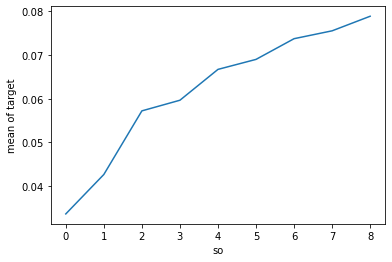

In [ ]:
# Let replot the transformed train set with the target, and plot the target
# mean per interval of the so variable.

# Note: so has been bined into 10 quantiles/intervals/bins according to the target mean!

# pandas.concat concatenates pandas objects along a particular axis with optional 
# set logic along the other axes.

# objs : a sequence or mapping of Series or DataFrame objects
# If a mapping is passed, the sorted keys will be used as the keys argument, 
# unless it is passed, in which case the values will be selected (see below). 
# Any None objects will be dropped silently unless they are all 
# None in which case a ValueError will be raised.

# axis : {0/’index’, 1/’columns’}, default 0
# The axis to concatenate along.

pd.concat([X_train_discret1, y_train], axis=1).groupby('so')['target'].mean().plot()

# Note: line chart shows the target mean according to each (so) bins 0, 1, 2, 3 ,4..

# add ylabel

plt.ylabel('mean of target')

# IMPORTANCE: we can see that relationship between so intervals and target is monotonic!

Text(0, 0.5, 'mean of target')

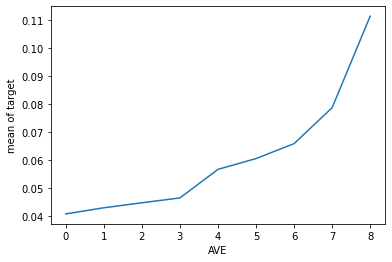

In [ ]:
# Let replot the transformed train set with the target, and plot the target
# mean per interval of the AVE variable.

# Note: AVE has been bined into 10 quantiles/intervals/bins according to the target mean!

# pandas.concat concatenates pandas objects along a particular axis with optional 
# set logic along the other axes.

# objs : a sequence or mapping of Series or DataFrame objects
# If a mapping is passed, the sorted keys will be used as the keys argument, 
# unless it is passed, in which case the values will be selected (see below). 
# Any None objects will be dropped silently unless they are all 
# None in which case a ValueError will be raised.

# axis : {0/’index’, 1/’columns’}, default 0
# The axis to concatenate along.

pd.concat([X_train_discret1, y_train], axis=1).groupby('AVE')['target'].mean().plot()

# Note: line chart shows the target mean according to each (AVE) bins 0, 1, 2, 3 ,4..

# add ylabel

plt.ylabel('mean of target')

# IMPORTANCE: we can see that relationship between so intervals and target is monotonic!

### Standardizing The Feature

Standardization is the process of centering the variable at zero and standardizing the 
variance to 1. To standardize features, we subtract the mean from each observation 
and then divide the result by the standard deviation.

The result of the preceding transformation is called the z-score and represents how many 
standard deviations a given observation deviates from the mean.


In [ ]:
# standardisation: with the StandardScaler from sklearn.

# sklearn.preprocessing.StandardScaler standardize feature by remove mean & scaling to unit variance.

# The standard score of a sample x is calculated as:
# z = (x - u) / s

# where u is the mean of the training samples or zero if with_mean=False, 
# and s is the standard deviation of the training samples or one if with_std=False.

# Let set up the scaler transformer.

scaler = StandardScaler()

# Let fit it to the train set so that it learns each variable's mean and standard deviation.

scaler.fit(X_train_enc)

# let standardize (transform) the train and test sets with the trained scaler.

X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

In [ ]:
# The scaler stores the mean of the features, learned from train set.

scaler.mean_

array([3.27270066e+02, 2.50983299e+02, 7.03714569e+01, 8.53812568e+01,
       2.97225264e+02, 4.24981344e+01, 8.52673896e+01, 1.50273220e+01,
       2.95613115e+00, 7.56830757e+00, 4.31610009e+01, 3.27962751e+00,
       2.15400475e+00, 2.98374568e+01, 3.17659480e+01, 3.95907800e+00,
       1.43811614e+00, 3.94412114e+00, 2.95767877e+00, 7.63471242e+00,
       2.62955390e-01, 9.08096419e-01, 2.09618605e-02, 1.48932562e-03,
       3.92418750e-02, 1.84337171e-02, 9.67796646e-03, 4.47396595e-01,
       1.12838941e-02, 2.26562997e-01, 1.21403888e-01, 1.88948250e-02,
       5.63929700e-03, 1.18722042e-02, 1.53702644e-04, 3.41325871e-03,
       3.42650894e-02, 3.17369459e-02, 3.07405287e-03, 1.46547521e-02,
       8.15154021e-03, 7.19752380e-03, 6.56681295e-03, 6.87951833e-03,
       8.62854841e-03, 6.56681295e-03, 1.25241154e-02, 4.02276919e-03,
       4.21357247e-03, 2.88324959e-03, 1.29322224e-03, 4.50507749e-04,
       6.36010939e-05, 2.98840340e-01, 3.30858191e-01, 1.77924060e-02,
      

In [ ]:
# The scaler stores the standard deviation deviation of the features, learned from train set.

scaler.scale_

array([1.27730272e+02, 9.62043170e+01, 7.38998784e+01, 5.17974785e+01,
       2.17652369e+02, 3.69469148e+01, 6.85194865e+01, 1.34707670e+01,
       3.58586143e+00, 9.22737802e+00, 3.80247289e+01, 4.51168456e+00,
       2.76943741e+00, 2.76565637e+01, 2.61058002e+01, 4.36734935e+00,
       1.74384439e+00, 4.24618822e+00, 2.84552046e+00, 6.52658959e+00,
       5.83593580e-02, 2.88889793e-01, 1.43256626e-01, 3.85630331e-02,
       1.94169900e-01, 1.34513624e-01, 9.78994557e-02, 4.97225182e-01,
       1.05624655e-01, 4.18607460e-01, 3.26596056e-01, 1.36153629e-01,
       7.48832112e-02, 1.08310918e-01, 1.23967342e-02, 5.83233090e-02,
       1.81909299e-01, 1.75298922e-01, 5.53588572e-02, 1.20166511e-01,
       8.99171430e-02, 8.45323574e-02, 8.07693625e-02, 8.26570660e-02,
       9.24883591e-02, 8.07693625e-02, 1.11208192e-01, 6.32976028e-02,
       6.47751363e-02, 5.36184340e-02, 3.59381388e-02, 2.12203862e-02,
       7.97477579e-03, 4.57749704e-01, 4.70522102e-01, 1.32196204e-01,
      

In [ ]:
# let convert the returned NumPy arrays to dataframes.

# pandas.DataFrame creates two-dimensional, size-mutable, potentially heterogeneous tabular data.

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_enc.columns)

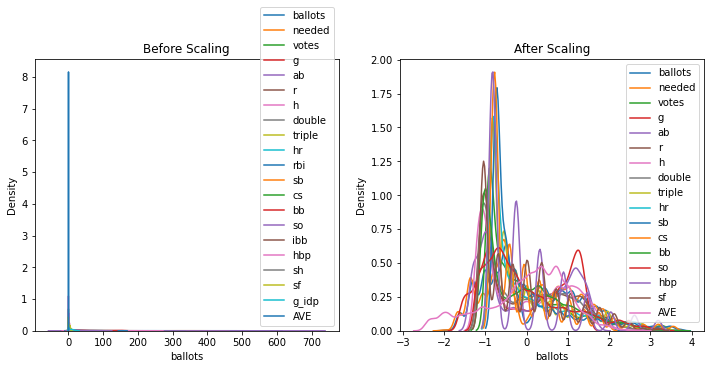

In [ ]:
# let compare the variable distributions before and after scaling.

# seaborn.kdeplot plots univariate or bivariate distributions using kernel density estimation.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')

sns.kdeplot(X_train_enc['ballots'], ax=ax1, label ='ballots')
sns.kdeplot(X_train_enc['needed'], ax=ax1, label ='needed')
sns.kdeplot(X_train_enc['votes'], ax=ax1, label ='votes')
sns.kdeplot(X_train_enc['g'], ax=ax1, label ='g')
sns.kdeplot(X_train_enc['ab'], ax=ax1, label ='ab')
sns.kdeplot(X_train_enc['r'], ax=ax1, label ='r')
sns.kdeplot(X_train_enc['h'], ax=ax1, label ='h')
sns.kdeplot(X_train_enc['double'], ax=ax1, label ='double')
sns.kdeplot(X_train_enc['triple'], ax=ax1, label ='triple')
sns.kdeplot(X_train_enc['hr'], ax=ax1, label ='hr')
sns.kdeplot(X_train_enc['rbi'], ax=ax1, label ='rbi')
sns.kdeplot(X_train_enc['sb'], ax=ax1, label ='sb')
sns.kdeplot(X_train_enc['cs'], ax=ax1, label ='cs')
sns.kdeplot(X_train_enc['bb'], ax=ax1, label ='bb')
sns.kdeplot(X_train_enc['so'], ax=ax1, label ='so')
sns.kdeplot(X_train_enc['ibb'], ax=ax1, label ='ibb')
sns.kdeplot(X_train_enc['hbp'], ax=ax1, label ='hbp')
sns.kdeplot(X_train_enc['sh'], ax=ax1, label ='sh')
sns.kdeplot(X_train_enc['sf'], ax=ax1, label ='sf')
sns.kdeplot(X_train_enc['g_idp'], ax=ax1, label ='g_idp')
sns.kdeplot(X_train_enc['AVE'], ax=ax1, label ='AVE')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')

sns.kdeplot(X_train_scaled['ballots'], ax=ax2, label ='ballots')
sns.kdeplot(X_train_scaled['needed'], ax=ax2, label ='needed')
sns.kdeplot(X_train_scaled['votes'], ax=ax2, label ='votes')
sns.kdeplot(X_train_scaled['g'], ax=ax2, label ='g')
sns.kdeplot(X_train_scaled['ab'], ax=ax2, label ='ab')
sns.kdeplot(X_train_scaled['r'], ax=ax2, label ='r')
sns.kdeplot(X_train_scaled['h'], ax=ax2, label ='h')
sns.kdeplot(X_train_scaled['double'], ax=ax2, label ='double')
sns.kdeplot(X_train_scaled['triple'], ax=ax2, label ='triple')
sns.kdeplot(X_train_scaled['hr'], ax=ax2, label ='hr')
sns.kdeplot(X_train_scaled['sb'], ax=ax2, label ='sb')
sns.kdeplot(X_train_scaled['cs'], ax=ax2, label ='cs')
sns.kdeplot(X_train_scaled['bb'], ax=ax2, label ='bb')
sns.kdeplot(X_train_scaled['so'], ax=ax2, label ='so')
sns.kdeplot(X_train_scaled['hbp'], ax=ax2, label ='hbp')
sns.kdeplot(X_train_scaled['sf'], ax=ax2, label ='sf')
sns.kdeplot(X_train_scaled['AVE'], ax=ax2, label ='AVE')
ax2.legend()

plt.show()

# NOte:The plots shows how standardisation centered all the distributions at zero,
# but it preserved their original distribution. The value range is not identical,
# but it looks more homogeneous across the variables.

### Correlation Between Two Features

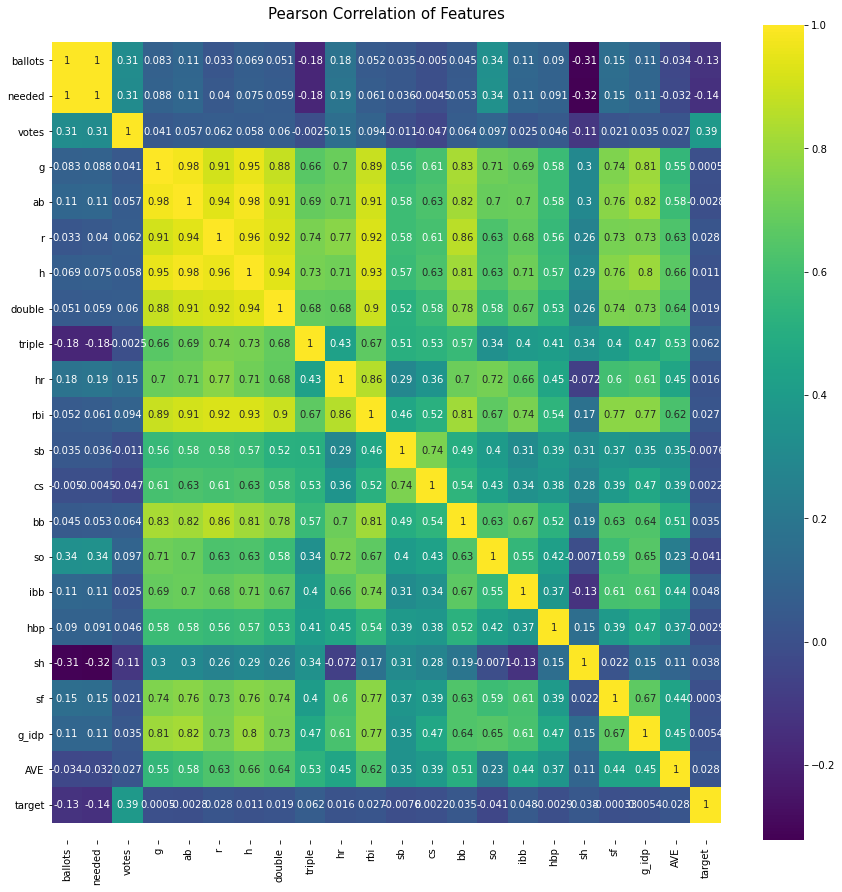

In [ ]:
# Let use heatmap to visualize the correlation between any two features / variables.

colormap = plt.cm.viridis # Creating colormaps

plt.figure(figsize=(15,15))

plt.title('Pearson Correlation of Features', size=15) # add title

# seaborn.heatmap plots rectangular data as a color-encoded matrix.

# data : rectangular dataset
# 2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, 
# the index/column information will be used to label the columns and rows.

# vmin, vmax : floats, optional
# Values to anchor the colormap, otherwise they are inferred from the data 
# and other keyword arguments.

# cmap : matplotlib colormap name or object, or list of colors, optional
# The mapping from data values to color space. If not provided, the default will depend on 
# whether center is set.

# annot : bool or rectangular dataset, optional
# If True, write the data value in each cell. If an array-like with the same shape as data, 
# then use this to annotate the heatmap instead of the data. 
# Note that DataFrames will match on position, not index.

ax = sns.heatmap(player_df_trimmed.corr(), cmap=colormap, annot=True)

# # set the ylim to bottom, top to avoid first and the last row is cut in halve!

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

# IMPORTANCE:
# Positive correlation  = One feature/variable UP, Another One UP
# Negative correlation = One feature/variable UP, Another DOWN

# Heatmap observation: 
# votes is the most correlated factor to the target.

## Step 4: Machine Learning Modelling

### Random Forest

In [ ]:
# Let create the Random Forest Model.

# The goal of ensemble methods is to combine predictions of several base estimators built with
# a given learning algorithm to improve generalizability / robustness over a single estimator.

# sklearn.ensemble.RandomForestClassifier is a random forest classifier.

# max_depth : int, default=None
# The maximum depth of the tree. 

rf_clf = ensemble.RandomForestClassifier(max_depth = 10)

# Let (fit) build a forest of trees from the training set.
                                                                       
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
# Score returns the mean accuracy on the given train and test data and labels.

print('train_acc:', rf_clf.score(X_train_scaled, y_train), 
      '\n test_acc:', rf_clf.score(X_test_scaled, y_test))

# Note: Overfitting = High accruacy in predicting the training set BUT 
# less accruate in new dataset (testing set)!

train_acc: 0.9778138183976764 
 test_acc: 0.9770720486755212


In [ ]:
# Feature Importance

pd.set_option('display.max_colwidth', None) # Set display the full text in dataframe

# pandas.concat concatenates pandas objects along a particular axis with optional set logic along the other axes.

# pandas.DataFrame creates two-dimensional, size-mutable, potentially heterogeneous tabular data.

# columns : Index or array-like
# Column labels to use for resulting frame when data does not have them, defaulting to RangeIndex(0, 1, 2, …, n).

# feature_importances_ndarray of shape (n_features,)
# The impurity-based feature importances.

# pandas.DataFrame.sort_values sorts by the values along either axis.

pd.concat((pd.DataFrame(X_train_scaled.columns, columns = ['feature']), 
           pd.DataFrame(rf_clf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

# IMPORTANCE: One of feature importance, votes have the highest correlation with target feature.

,feature,importance
2,votes,0.274761
25,votedby_Veterans,0.239299
0,ballots,0.108772
1,needed,0.074129
21,votedby_BBWAA,0.066071
...,...,...
100,team_id_LAA,0.000000
92,team_id_ANA,0.000000
96,team_id_TBA,0.000000
95,team_id_BLF,0.000000


### Logistic Regression

In [ ]:
# Let instantiate the model.

logmodel = LogisticRegression(solver='saga')

# Let fit the model with data

logmodel.fit(X_train_scaled, y_train)

C:\Users\wilt7\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='saga')

In [ ]:
# Let get the attributes of the model, attribute .classes_ represents array of distinct values 
# that y takes.

logmodel.classes_

# Note: This is the example of binary classification, and y can be 0 or 1, as indicated.

array([0, 1])

In [ ]:
# Let get the value of the slope 𝑏₁ and the intercept 𝑏₀ of the linear function 𝑓.

print(logmodel.intercept_)

print(logmodel.coef_)

# Note: As you can see, 𝑏₀ is given inside a one-dimensional array, 
# while 𝑏₁ is inside a two-dimensional array. 

[-4.00616249]
[[-0.54120867 -0.48423466  1.54208131 -0.07421485 -0.16053115  0.05621052
  -0.06363064  0.02713899  0.06128421  0.02371428 -0.01363243 -0.05793558
   0.0663734   0.14374304 -0.01755623  0.05572277 -0.05622412  0.05701887
   0.03119673  0.03092603  0.00697894 -0.57058216 -0.32962756  0.31362161
  -0.30593914  0.77628937 -0.23592698  0.12678583 -0.00953231 -0.04151144
  -0.00358454 -0.06027729 -0.00573237 -0.10405022 -0.01939849 -0.03374709
   0.06326163 -0.05319965 -0.01241694 -0.01098315 -0.02924119  0.04773183
  -0.03778459 -0.07713281 -0.02069559 -0.10998292  0.04799573 -0.04297359
  -0.09797455  0.02285462  0.03302153 -0.03075475  0.00732486  0.04867676
   0.11932856  0.13633898 -0.02062563 -0.00703049  0.10829045 -0.08255639
   0.05378843  0.1912538  -0.00322349 -0.02202769  0.02182532  0.05375669
  -0.05683455  0.06113285 -0.04980482 -0.02947185 -0.0775819  -0.11211666
  -0.02034537 -0.06698724 -0.0160501  -0.05369443  0.02544765 -0.02487614
   0.00477629  0.0099482

In [ ]:
# Score returns the mean accuracy on the given test data and labels.

print('train_acc:', logmodel.score(X_train_scaled, y_train), 
      '\n test_acc:',  logmodel.score(X_test_scaled, y_test))

# Note: Overfitting = High accruacy in predicting the training set BUT 
# less accruate in new dataset (testing set)!

train_acc: 0.9697311793762853 
 test_acc: 0.9688976280576785
